In [8]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.1/281.1 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.5 MB/s eta 0:00:00


In [9]:
import pandas as pd
import wandb

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [14]:
root_folder = "gdrive/MyDrive/emotion_recognition/"
data_path = root_folder + "data_init/"
data_seg_path = root_folder + "data_init_segments/"
res_folder = root_folder + 'experiments/'
audio_features_folder = res_folder + "audio_features/"
text_features_folder = res_folder + "text_features/"

# Data preparation

In [4]:
df_file = pd.read_csv(res_folder+'init.csv', ).reset_index(drop=True)


df_file['emotion_merged'] = df_file['emotion']
df_file.loc[df_file['emotion_merged'] == 'pleasant_surprise', 'emotion_merged'] = 'happy'
df_file.loc[df_file['emotion_merged'] == 'disgust', 'emotion_merged'] = 'angry'
df_file['label'] = df_file['emotion_merged'].apply(lambda x: 'no-conflict' if x in ['neutral', 'happy'] else 'conflict')
df_file['path'] = data_path + df_file['folder_name'] + '/' + "rs_16_" + df_file['audio_file_name']
df_file['folder'] = df_file.path.str.split('/').str[4]

df_file = df_file.drop(columns=['Unnamed: 0', 'emotion'])


In [5]:
def change_lang(lang, langid_lang):
  if lang == 's':
    if langid_lang == 'ru':
      return 'r'
    return 'u'
  return lang


df_seg = pd.read_csv(data_seg_path+'seg_info.csv').drop([48]).reset_index(drop=True)
df_seg['emotion_merged'] = df_seg['emotion']
df_seg.loc[df_seg['emotion_merged'] == 'pleasant_surprise', 'emotion_merged'] = 'happy'
df_seg.loc[df_seg['emotion_merged'] == 'disgust', 'emotion_merged'] = 'angry'
df_seg['label'] = df_seg['emotion_merged'].apply(lambda x: 'no-conflict' if x in ['neutral', 'happy'] else 'conflict')
df_seg['context_label'] = df_seg['emotion_context'].apply(lambda x: 'no-conflict' if x in ['neutral', 'happy', 'pleasant_surprise'] else 'conflict')

df_seg['language'] = df_seg.apply(lambda row: change_lang(row['language'], row['langid_language']),
                                  axis=1)
df_seg['path'] = df_seg['folder_name'] + df_seg['res_file_name']

df_seg = df_seg.drop(columns=['Unnamed: 0', 'folder_name', 'file_name',
                              'info', 'emotion', 'langid_language'])

In [6]:
def merge_labels(df_meta, df_features, drop_index=False, merge_on="path"):
  return df_features.reset_index(drop=drop_index) \
                    .rename(columns={"file":"path"}) \
                    .merge(df_meta[[merge_on, 'label']], on=merge_on, how='inner', suffixes=('_1', '_2'))

In [7]:
df_file_smile_func_compare = pd.read_csv(audio_features_folder+'file_smile_func_compare.csv')
df_seg_smile_func_compare = pd.read_csv(audio_features_folder+'seg_smile_func_compare.csv')
df_file_smile_lld_compare = pd.read_csv(audio_features_folder+'file_smile_lld_compare.csv')
df_seg_smile_lld_compare = pd.read_csv(audio_features_folder+'seg_smile_lld_compare.csv')

df_file_smile_func_compare = merge_labels(df_file, df_file_smile_func_compare, drop_index=True)
df_seg_smile_func_compare = merge_labels(df_seg, df_seg_smile_func_compare, drop_index=True)

In [68]:
df_file_hs_300m = pd.read_csv(audio_features_folder+"file_hs_w2v_no-tune_fb_xls-r-300m.csv")
df_file_hs_300m.pop('Unnamed: 0')

df_file_ef_300m = pd.read_csv(audio_features_folder+"file_ef_w2v_no-tune_fb_xls-r-300m.csv")
df_file_ef_300m.pop('Unnamed: 0')

df_seg_hs_300m = pd.read_csv(audio_features_folder+"seg_hs_w2v_no-tune_fb_xls-r-300m.csv")
df_seg_hs_300m.pop('Unnamed: 0')

df_seg_ef_300m = pd.read_csv(audio_features_folder+"seg_ef_w2v_no-tune_fb_xls-r-300m.csv")
df_seg_ef_300m.pop('Unnamed: 0')



df_file_hs_1b = pd.read_csv(audio_features_folder+"file_hs_wav2vec2-xls-r-1b.csv")
df_file_hs_1b.pop('Unnamed: 0')

df_file_ef_1b = pd.read_csv(audio_features_folder+"file_ef_wav2vec2-xls-r-1b.csv")
df_file_ef_1b.pop('Unnamed: 0')

df_seg_hs_1b = pd.read_csv(audio_features_folder+"seg_hs_wav2vec2-xls-r-1b.csv")
df_seg_hs_1b.pop('Unnamed: 0')

df_seg_ef_1b = pd.read_csv(audio_features_folder+"seg_ef_wav2vec2-xls-r-1b.csv")
df_seg_ef_1b.pop('Unnamed: 0')


df_file_hs_2b = pd.read_csv(audio_features_folder+"file_hs_wav2vec2-xls-r-2b.csv")
df_file_hs_2b.pop('Unnamed: 0')

df_file_ef_2b = pd.read_csv(audio_features_folder+"file_ef_wav2vec2-xls-r-2b.csv")
df_file_ef_2b.pop('Unnamed: 0')

df_seg_hs_2b = pd.read_csv(audio_features_folder+"seg_hs_wav2vec2-xls-r-2b.csv")
df_seg_hs_2b.pop('Unnamed: 0')

df_seg_ef_2b = pd.read_csv(audio_features_folder+"seg_ef_wav2vec2-xls-r-2b.csv")
df_seg_ef_2b.pop('Unnamed: 0')

0        0
1        1
2        2
3        3
4        4
      ... 
540    540
541    541
542    542
543    543
544    544
Name: Unnamed: 0, Length: 545, dtype: int64

In [204]:
roberta_pipline_twitter_out_eng_df = pd.read_csv(text_features_folder + 'twitter-roberta-base-sentiment-latest.csv')
roberta_pipline_twitter_out_eng_df.pop('Unnamed: 0')

mdeberta_xnli_multi_transc = pd.read_csv(text_features_folder + 'transc_file_mDeBERTa-v3-base-mnli-xnli.csv')
mdeberta_xnli_multi_transc.pop('Unnamed: 0')

mdeberta_xnli_multi_origin = pd.read_csv(text_features_folder + 'origin_file_mDeBERTa-v3-base-mnli-xnli.csv')
mdeberta_xnli_multi_origin.pop('Unnamed: 0')


0      0
1      1
2      2
3      3
4      4
      ..
85    85
86    86
87    87
88    88
89    89
Name: Unnamed: 0, Length: 90, dtype: int64

In [209]:
roberta_pipline_twitter_out_eng_df['path'] = roberta_pipline_twitter_out_eng_df['path'].str.replace('rs_16_rs_16_', 'rs_16_')
mdeberta_xnli_multi_transc['path'] = mdeberta_xnli_multi_transc['path'].str.replace('rs_16_rs_16_', 'rs_16_')
mdeberta_xnli_multi_origin['path'] = mdeberta_xnli_multi_origin['path'].str.replace('rs_16_rs_16_', 'rs_16_')

## Selected smile features

In [55]:
selected_feature_names = ['audspecRasta_lengthL1norm_sma_kurtosis',
 'audspecRasta_lengthL1norm_sma_maxSegLen',
 'audspecRasta_lengthL1norm_sma_de_kurtosis',
 'audSpec_Rfilt_sma[0]_kurtosis', 'audSpec_Rfilt_sma[1]_kurtosis',
 'audSpec_Rfilt_sma[2]_kurtosis', 'audSpec_Rfilt_sma[3]_kurtosis',
 'audSpec_Rfilt_sma[4]_kurtosis', 'audSpec_Rfilt_sma[5]_range',
 'audSpec_Rfilt_sma[5]_kurtosis', 'audSpec_Rfilt_sma[6]_kurtosis',
 'audSpec_Rfilt_sma[7]_kurtosis', 'audSpec_Rfilt_sma[8]_range',
 'audSpec_Rfilt_sma[9]_range', 'audSpec_Rfilt_sma[9]_kurtosis',
 'audSpec_Rfilt_sma[10]_kurtosis', 'audSpec_Rfilt_sma[10]_maxSegLen',
 'audSpec_Rfilt_sma[11]_kurtosis', 'audSpec_Rfilt_sma[12]_kurtosis',
 'audSpec_Rfilt_sma[13]_kurtosis', 'audSpec_Rfilt_sma[14]_range',
 'audSpec_Rfilt_sma[14]_kurtosis', 'audSpec_Rfilt_sma[16]_kurtosis',
 'audSpec_Rfilt_sma[16]_maxSegLen', 'audSpec_Rfilt_sma[18]_range',
 'audSpec_Rfilt_sma[18]_kurtosis', 'audSpec_Rfilt_sma[20]_kurtosis',
 'audSpec_Rfilt_sma[21]_kurtosis', 'audSpec_Rfilt_sma[22]_kurtosis',
 'audSpec_Rfilt_sma[23]_kurtosis', 'audSpec_Rfilt_sma[24]_kurtosis',
 'audSpec_Rfilt_sma[25]_kurtosis', 'pcm_fftMag_fband250-650_sma_kurtosis',
 'pcm_fftMag_fband250-650_sma_maxSegLen',
 'pcm_fftMag_fband1000-4000_sma_kurtosis',
 'pcm_fftMag_spectralRollOff25.0_sma_range',
 'pcm_fftMag_spectralRollOff25.0_sma_quartile1',
 'pcm_fftMag_spectralRollOff25.0_sma_quartile2',
 'pcm_fftMag_spectralRollOff25.0_sma_quartile3',
 'pcm_fftMag_spectralRollOff25.0_sma_iqr1-2',
 'pcm_fftMag_spectralRollOff25.0_sma_iqr2-3',
 'pcm_fftMag_spectralRollOff25.0_sma_iqr1-3',
 'pcm_fftMag_spectralRollOff25.0_sma_percentile1.0',
 'pcm_fftMag_spectralRollOff25.0_sma_percentile99.0',
 'pcm_fftMag_spectralRollOff25.0_sma_pctlrange0-1',
 'pcm_fftMag_spectralRollOff25.0_sma_stddev',
 'pcm_fftMag_spectralRollOff25.0_sma_lpgain',
 'pcm_fftMag_spectralRollOff50.0_sma_range',
 'pcm_fftMag_spectralRollOff50.0_sma_quartile1',
 'pcm_fftMag_spectralRollOff50.0_sma_quartile2',
 'pcm_fftMag_spectralRollOff50.0_sma_quartile3',
 'pcm_fftMag_spectralRollOff50.0_sma_iqr1-2',
 'pcm_fftMag_spectralRollOff50.0_sma_iqr2-3',
 'pcm_fftMag_spectralRollOff50.0_sma_iqr1-3',
 'pcm_fftMag_spectralRollOff50.0_sma_percentile1.0',
 'pcm_fftMag_spectralRollOff50.0_sma_percentile99.0',
 'pcm_fftMag_spectralRollOff50.0_sma_pctlrange0-1',
 'pcm_fftMag_spectralRollOff50.0_sma_stddev',
 'pcm_fftMag_spectralRollOff50.0_sma_lpgain',
 'pcm_fftMag_spectralRollOff75.0_sma_range',
 'pcm_fftMag_spectralRollOff75.0_sma_quartile1',
 'pcm_fftMag_spectralRollOff75.0_sma_quartile2',
 'pcm_fftMag_spectralRollOff75.0_sma_quartile3',
 'pcm_fftMag_spectralRollOff75.0_sma_iqr1-2',
 'pcm_fftMag_spectralRollOff75.0_sma_iqr2-3',
 'pcm_fftMag_spectralRollOff75.0_sma_iqr1-3',
 'pcm_fftMag_spectralRollOff75.0_sma_percentile1.0',
 'pcm_fftMag_spectralRollOff75.0_sma_percentile99.0',
 'pcm_fftMag_spectralRollOff75.0_sma_pctlrange0-1',
 'pcm_fftMag_spectralRollOff75.0_sma_stddev',
 'pcm_fftMag_spectralRollOff75.0_sma_lpgain',
 'pcm_fftMag_spectralRollOff90.0_sma_range',
 'pcm_fftMag_spectralRollOff90.0_sma_quartile1',
 'pcm_fftMag_spectralRollOff90.0_sma_quartile2',
 'pcm_fftMag_spectralRollOff90.0_sma_quartile3',
 'pcm_fftMag_spectralRollOff90.0_sma_iqr1-2',
 'pcm_fftMag_spectralRollOff90.0_sma_iqr2-3',
 'pcm_fftMag_spectralRollOff90.0_sma_iqr1-3',
 'pcm_fftMag_spectralRollOff90.0_sma_percentile1.0',
 'pcm_fftMag_spectralRollOff90.0_sma_percentile99.0',
 'pcm_fftMag_spectralRollOff90.0_sma_pctlrange0-1',
 'pcm_fftMag_spectralRollOff90.0_sma_stddev',
 'pcm_fftMag_spectralFlux_sma_kurtosis',
 'pcm_fftMag_spectralCentroid_sma_range',
 'pcm_fftMag_spectralCentroid_sma_quartile1',
 'pcm_fftMag_spectralCentroid_sma_quartile2',
 'pcm_fftMag_spectralCentroid_sma_quartile3',
 'pcm_fftMag_spectralCentroid_sma_iqr1-2',
 'pcm_fftMag_spectralCentroid_sma_iqr2-3',
 'pcm_fftMag_spectralCentroid_sma_iqr1-3',
 'pcm_fftMag_spectralCentroid_sma_percentile1.0',
 'pcm_fftMag_spectralCentroid_sma_percentile99.0',
 'pcm_fftMag_spectralCentroid_sma_pctlrange0-1',
 'pcm_fftMag_spectralCentroid_sma_stddev',
 'pcm_fftMag_spectralCentroid_sma_lpgain',
 'pcm_fftMag_spectralVariance_sma_percentile1.0',
 'pcm_fftMag_spectralKurtosis_sma_range',
 'pcm_fftMag_spectralKurtosis_sma_quartile3',
 'pcm_fftMag_spectralKurtosis_sma_iqr2-3',
 'pcm_fftMag_spectralKurtosis_sma_iqr1-3',
 'pcm_fftMag_spectralKurtosis_sma_percentile99.0',
 'pcm_fftMag_spectralKurtosis_sma_pctlrange0-1',
 'pcm_fftMag_spectralKurtosis_sma_stddev',
 'pcm_fftMag_spectralKurtosis_sma_kurtosis',
 'pcm_fftMag_spectralKurtosis_sma_meanSegLen',
 'pcm_fftMag_spectralKurtosis_sma_maxSegLen',
 'pcm_fftMag_spectralKurtosis_sma_lpgain',
 'pcm_fftMag_spectralSlope_sma_kurtosis',
 'pcm_fftMag_spectralSlope_sma_maxSegLen',
 'pcm_fftMag_spectralHarmonicity_sma_kurtosis',
 'pcm_fftMag_spectralHarmonicity_sma_maxSegLen', 'mfcc_sma[1]_range',
 'mfcc_sma[1]_quartile1', 'mfcc_sma[1]_percentile1.0',
 'mfcc_sma[1]_percentile99.0', 'mfcc_sma[2]_range', 'mfcc_sma[2]_quartile1',
 'mfcc_sma[2]_quartile2', 'mfcc_sma[2]_quartile3',
 'mfcc_sma[2]_percentile1.0', 'mfcc_sma[3]_range', 'mfcc_sma[3]_quartile2',
 'mfcc_sma[3]_iqr1-3', 'mfcc_sma[3]_pctlrange0-1', 'mfcc_sma[4]_range',
 'mfcc_sma[4]_percentile99.0', 'mfcc_sma[4]_pctlrange0-1',
 'mfcc_sma[5]_range', 'mfcc_sma[5]_percentile1.0',
 'mfcc_sma[5]_pctlrange0-1', 'mfcc_sma[6]_range', 'mfcc_sma[6]_quartile1',
 'mfcc_sma[6]_iqr1-3', 'mfcc_sma[6]_percentile1.0',
 'mfcc_sma[6]_percentile99.0', 'mfcc_sma[7]_range', 'mfcc_sma[8]_range',
 'mfcc_sma[8]_pctlrange0-1', 'mfcc_sma[9]_range', 'mfcc_sma[9]_quartile1',
 'mfcc_sma[9]_quartile2', 'mfcc_sma[9]_percentile1.0',
 'mfcc_sma[9]_pctlrange0-1', 'mfcc_sma[10]_range',
 'mfcc_sma[10]_percentile1.0', 'mfcc_sma[10]_percentile99.0',
 'mfcc_sma[10]_pctlrange0-1', 'mfcc_sma[11]_range', 'mfcc_sma[11]_quartile1',
 'mfcc_sma[11]_percentile1.0', 'mfcc_sma[11]_percentile99.0',
 'mfcc_sma[12]_range', 'mfcc_sma[12]_percentile99.0',
 'mfcc_sma[12]_pctlrange0-1', 'mfcc_sma[13]_range',
 'mfcc_sma[13]_percentile1.0', 'mfcc_sma[13]_pctlrange0-1',
 'mfcc_sma[14]_range', 'mfcc_sma[14]_percentile1.0',
 'mfcc_sma[14]_percentile99.0', 'audSpec_Rfilt_sma_de[1]_kurtosis',
 'audSpec_Rfilt_sma_de[1]_maxSegLen', 'audSpec_Rfilt_sma_de[2]_minSegLen',
 'audSpec_Rfilt_sma_de[3]_kurtosis', 'audSpec_Rfilt_sma_de[3]_maxSegLen',
 'audSpec_Rfilt_sma_de[4]_kurtosis', 'audSpec_Rfilt_sma_de[4]_maxSegLen',
 'audSpec_Rfilt_sma_de[4]_minSegLen', 'audSpec_Rfilt_sma_de[5]_kurtosis',
 'audSpec_Rfilt_sma_de[6]_kurtosis', 'audSpec_Rfilt_sma_de[6]_maxSegLen',
 'audSpec_Rfilt_sma_de[7]_kurtosis', 'audSpec_Rfilt_sma_de[7]_meanSegLen',
 'audSpec_Rfilt_sma_de[7]_minSegLen', 'audSpec_Rfilt_sma_de[8]_maxSegLen',
 'audSpec_Rfilt_sma_de[9]_kurtosis', 'audSpec_Rfilt_sma_de[9]_maxSegLen',
 'audSpec_Rfilt_sma_de[10]_kurtosis', 'audSpec_Rfilt_sma_de[10]_meanSegLen',
 'audSpec_Rfilt_sma_de[11]_kurtosis', 'audSpec_Rfilt_sma_de[11]_maxSegLen',
 'audSpec_Rfilt_sma_de[12]_maxSegLen',
 'audSpec_Rfilt_sma_de[12]_segLenStddev',
 'audSpec_Rfilt_sma_de[13]_kurtosis', 'audSpec_Rfilt_sma_de[13]_meanSegLen',
 'audSpec_Rfilt_sma_de[13]_maxSegLen', 'audSpec_Rfilt_sma_de[14]_kurtosis',
 'audSpec_Rfilt_sma_de[16]_minSegLen',
 'audSpec_Rfilt_sma_de[17]_meanSegLen',
 'audSpec_Rfilt_sma_de[17]_maxSegLen',
 'audSpec_Rfilt_sma_de[17]_segLenStddev',
 'audSpec_Rfilt_sma_de[18]_kurtosis', 'audSpec_Rfilt_sma_de[18]_maxSegLen',
 'audSpec_Rfilt_sma_de[20]_kurtosis', 'audSpec_Rfilt_sma_de[21]_kurtosis',
 'audSpec_Rfilt_sma_de[22]_kurtosis', 'audSpec_Rfilt_sma_de[23]_kurtosis',
 'audSpec_Rfilt_sma_de[24]_kurtosis', 'audSpec_Rfilt_sma_de[25]_kurtosis',
 'pcm_fftMag_fband250-650_sma_de_kurtosis',
 'pcm_fftMag_fband1000-4000_sma_de_kurtosis',
 'pcm_fftMag_fband1000-4000_sma_de_maxSegLen',
 'pcm_fftMag_fband1000-4000_sma_de_minSegLen',
 'pcm_fftMag_spectralRollOff25.0_sma_de_range',
 'pcm_fftMag_spectralRollOff25.0_sma_de_quartile1',
 'pcm_fftMag_spectralRollOff25.0_sma_de_iqr1-2',
 'pcm_fftMag_spectralRollOff25.0_sma_de_iqr2-3',
 'pcm_fftMag_spectralRollOff25.0_sma_de_iqr1-3',
 'pcm_fftMag_spectralRollOff25.0_sma_de_percentile1.0',
 'pcm_fftMag_spectralRollOff25.0_sma_de_percentile99.0',
 'pcm_fftMag_spectralRollOff25.0_sma_de_pctlrange0-1',
 'pcm_fftMag_spectralRollOff25.0_sma_de_kurtosis',
 'pcm_fftMag_spectralRollOff25.0_sma_de_lpgain',
 'pcm_fftMag_spectralRollOff50.0_sma_de_range',
 'pcm_fftMag_spectralRollOff50.0_sma_de_percentile1.0',
 'pcm_fftMag_spectralRollOff50.0_sma_de_percentile99.0',
 'pcm_fftMag_spectralRollOff50.0_sma_de_pctlrange0-1',
 'pcm_fftMag_spectralRollOff50.0_sma_de_stddev',
 'pcm_fftMag_spectralRollOff50.0_sma_de_lpgain',
 'pcm_fftMag_spectralRollOff75.0_sma_de_range',
 'pcm_fftMag_spectralRollOff75.0_sma_de_quartile1',
 'pcm_fftMag_spectralRollOff75.0_sma_de_iqr1-2',
 'pcm_fftMag_spectralRollOff75.0_sma_de_iqr1-3',
 'pcm_fftMag_spectralRollOff75.0_sma_de_percentile99.0',
 'pcm_fftMag_spectralRollOff75.0_sma_de_pctlrange0-1',
 'pcm_fftMag_spectralRollOff75.0_sma_de_lpgain',
 'pcm_fftMag_spectralRollOff90.0_sma_de_range',
 'pcm_fftMag_spectralRollOff90.0_sma_de_quartile3',
 'pcm_fftMag_spectralRollOff90.0_sma_de_iqr2-3',
 'pcm_fftMag_spectralRollOff90.0_sma_de_iqr1-3',
 'pcm_fftMag_spectralRollOff90.0_sma_de_percentile1.0',
 'pcm_fftMag_spectralRollOff90.0_sma_de_percentile99.0',
 'pcm_fftMag_spectralRollOff90.0_sma_de_pctlrange0-1',
 'pcm_fftMag_spectralRollOff90.0_sma_de_stddev',
 'pcm_fftMag_spectralRollOff90.0_sma_de_lpgain',
 'pcm_fftMag_spectralFlux_sma_de_kurtosis',
 'pcm_fftMag_spectralFlux_sma_de_meanSegLen',
 'pcm_fftMag_spectralFlux_sma_de_maxSegLen',
 'pcm_fftMag_spectralFlux_sma_de_minSegLen',
 'pcm_fftMag_spectralCentroid_sma_de_range',
 'pcm_fftMag_spectralCentroid_sma_de_iqr1-3',
 'pcm_fftMag_spectralCentroid_sma_de_percentile1.0',
 'pcm_fftMag_spectralCentroid_sma_de_percentile99.0',
 'pcm_fftMag_spectralCentroid_sma_de_pctlrange0-1',
 'pcm_fftMag_spectralCentroid_sma_de_stddev',
 'pcm_fftMag_spectralCentroid_sma_de_lpgain',
 'pcm_fftMag_spectralVariance_sma_de_quartile2',
 'pcm_fftMag_spectralSkewness_sma_de_meanSegLen',
 'pcm_fftMag_spectralSkewness_sma_de_maxSegLen',
 'pcm_fftMag_spectralSkewness_sma_de_segLenStddev',
 'pcm_fftMag_spectralKurtosis_sma_de_range',
 'pcm_fftMag_spectralKurtosis_sma_de_percentile99.0',
 'pcm_fftMag_spectralKurtosis_sma_de_pctlrange0-1',
 'pcm_fftMag_spectralKurtosis_sma_de_stddev',
 'pcm_fftMag_spectralKurtosis_sma_de_kurtosis',
 'pcm_fftMag_spectralKurtosis_sma_de_meanSegLen',
 'pcm_fftMag_spectralKurtosis_sma_de_minSegLen',
 'pcm_fftMag_spectralKurtosis_sma_de_lpgain',
 'pcm_fftMag_spectralSlope_sma_de_maxSegLen',
 'pcm_fftMag_spectralSlope_sma_de_minSegLen',
 'pcm_fftMag_spectralHarmonicity_sma_de_kurtosis',
 'pcm_fftMag_spectralHarmonicity_sma_de_meanSegLen',
 'pcm_fftMag_spectralHarmonicity_sma_de_minSegLen', 'mfcc_sma_de[1]_range',
 'mfcc_sma_de[10]_range', 'mfcc_sma_de[12]_range', 'F0final_sma_amean',
 'F0final_sma_rqmean', 'F0final_sma_range', 'F0final_sma_quartile1',
 'F0final_sma_quartile2', 'F0final_sma_quartile3', 'F0final_sma_iqr1-2',
 'F0final_sma_iqr1-3', 'F0final_sma_percentile99.0',
 'F0final_sma_pctlrange0-1', 'F0final_sma_kurtosis', 'F0final_sma_lpgain',
 'jitterDDP_sma_kurtosis', 'logHNR_sma_rqmean', 'logHNR_sma_range',
 'logHNR_sma_quartile1', 'logHNR_sma_quartile2', 'logHNR_sma_iqr1-2',
 'logHNR_sma_iqr1-3', 'logHNR_sma_percentile1.0',
 'logHNR_sma_percentile99.0', 'logHNR_sma_pctlrange0-1', 'logHNR_sma_lpgain',
 'F0final_sma_de_kurtosis', 'voicingFinalUnclipped_sma_de_skewness',
 'voicingFinalUnclipped_sma_de_kurtosis', 'jitterLocal_sma_de_skewness',
 'jitterLocal_sma_de_kurtosis', 'jitterDDP_sma_de_kurtosis',
 'shimmerLocal_sma_de_skewness', 'shimmerLocal_sma_de_kurtosis',
 'logHNR_sma_de_skewness', 'logHNR_sma_de_kurtosis',
 'audspecRasta_lengthL1norm_sma_meanRisingSlope',
 'audspecRasta_lengthL1norm_sma_stddevFallingSlope',
 'audSpec_Rfilt_sma[2]_meanRisingSlope',
 'audSpec_Rfilt_sma[2]_stddevRisingSlope',
 'audSpec_Rfilt_sma[3]_meanRisingSlope',
 'audSpec_Rfilt_sma[3]_stddevFallingSlope',
 'audSpec_Rfilt_sma[4]_meanRisingSlope',
 'audSpec_Rfilt_sma[5]_peakRangeAbs',
 'audSpec_Rfilt_sma[5]_meanRisingSlope',
 'audSpec_Rfilt_sma[5]_stddevRisingSlope',
 'audSpec_Rfilt_sma[5]_stddevFallingSlope',
 'audSpec_Rfilt_sma[6]_peakRangeAbs',
 'audSpec_Rfilt_sma[6]_meanRisingSlope',
 'audSpec_Rfilt_sma[6]_stddevRisingSlope',
 'audSpec_Rfilt_sma[7]_stddevFallingSlope',
 'audSpec_Rfilt_sma[8]_peakRangeAbs',
 'audSpec_Rfilt_sma[8]_meanRisingSlope',
 'audSpec_Rfilt_sma[8]_stddevRisingSlope',
 'audSpec_Rfilt_sma[9]_peakRangeAbs', 'audSpec_Rfilt_sma[9]_peakMeanAbs',
 'audSpec_Rfilt_sma[9]_meanRisingSlope',
 'audSpec_Rfilt_sma[9]_stddevRisingSlope',
 'audSpec_Rfilt_sma[9]_stddevFallingSlope',
 'audSpec_Rfilt_sma[10]_meanRisingSlope',
 'audSpec_Rfilt_sma[10]_stddevRisingSlope',
 'audSpec_Rfilt_sma[11]_meanRisingSlope',
 'audSpec_Rfilt_sma[11]_stddevRisingSlope',
 'audSpec_Rfilt_sma[11]_meanFallingSlope',
 'audSpec_Rfilt_sma[11]_stddevFallingSlope',
 'audSpec_Rfilt_sma[12]_meanFallingSlope',
 'audSpec_Rfilt_sma[12]_stddevFallingSlope',
 'audSpec_Rfilt_sma[13]_meanFallingSlope',
 'audSpec_Rfilt_sma[13]_stddevFallingSlope',
 'audSpec_Rfilt_sma[14]_stddevRisingSlope',
 'audSpec_Rfilt_sma[14]_meanFallingSlope',
 'audSpec_Rfilt_sma[15]_meanRisingSlope',
 'audSpec_Rfilt_sma[15]_stddevFallingSlope',
 'audSpec_Rfilt_sma[16]_meanRisingSlope',
 'audSpec_Rfilt_sma[16]_stddevRisingSlope',
 'audSpec_Rfilt_sma[16]_stddevFallingSlope',
 'audSpec_Rfilt_sma[17]_meanRisingSlope',
 'audSpec_Rfilt_sma[18]_peakRangeAbs',
 'audSpec_Rfilt_sma[18]_meanRisingSlope',
 'audSpec_Rfilt_sma[18]_stddevRisingSlope',
 'audSpec_Rfilt_sma[18]_meanFallingSlope',
 'audSpec_Rfilt_sma[18]_stddevFallingSlope',
 'audSpec_Rfilt_sma[20]_stddevFallingSlope',
 'audSpec_Rfilt_sma[21]_stddevFallingSlope',
 'audSpec_Rfilt_sma[22]_stddevFallingSlope',
 'pcm_fftMag_fband250-650_sma_meanRisingSlope',
 'pcm_fftMag_fband250-650_sma_stddevRisingSlope',
 'pcm_fftMag_fband250-650_sma_meanFallingSlope',
 'pcm_fftMag_fband250-650_sma_stddevFallingSlope',
 'pcm_fftMag_spectralRollOff25.0_sma_amean',
 'pcm_fftMag_spectralRollOff25.0_sma_rqmean',
 'pcm_fftMag_spectralRollOff25.0_sma_peakRangeAbs',
 'pcm_fftMag_spectralRollOff25.0_sma_peakMeanAbs',
 'pcm_fftMag_spectralRollOff25.0_sma_peakMeanMeanDist',
 'pcm_fftMag_spectralRollOff25.0_sma_meanRisingSlope',
 'pcm_fftMag_spectralRollOff25.0_sma_stddevRisingSlope',
 'pcm_fftMag_spectralRollOff25.0_sma_meanFallingSlope',
 'pcm_fftMag_spectralRollOff25.0_sma_stddevFallingSlope',
 'pcm_fftMag_spectralRollOff50.0_sma_amean',
 'pcm_fftMag_spectralRollOff50.0_sma_rqmean',
 'pcm_fftMag_spectralRollOff50.0_sma_peakRangeAbs',
 'pcm_fftMag_spectralRollOff50.0_sma_peakMeanMeanDist',
 'pcm_fftMag_spectralRollOff50.0_sma_meanRisingSlope',
 'pcm_fftMag_spectralRollOff50.0_sma_meanFallingSlope',
 'pcm_fftMag_spectralRollOff75.0_sma_amean',
 'pcm_fftMag_spectralRollOff75.0_sma_rqmean',
 'pcm_fftMag_spectralRollOff75.0_sma_peakRangeAbs',
 'pcm_fftMag_spectralRollOff75.0_sma_peakMeanAbs',
 'pcm_fftMag_spectralRollOff75.0_sma_peakMeanMeanDist',
 'pcm_fftMag_spectralRollOff75.0_sma_stddevFallingSlope',
 'pcm_fftMag_spectralRollOff90.0_sma_amean',
 'pcm_fftMag_spectralRollOff90.0_sma_rqmean',
 'pcm_fftMag_spectralRollOff90.0_sma_peakRangeAbs',
 'pcm_fftMag_spectralRollOff90.0_sma_peakMeanAbs',
 'pcm_fftMag_spectralRollOff90.0_sma_peakMeanMeanDist',
 'pcm_fftMag_spectralRollOff90.0_sma_meanRisingSlope',
 'pcm_fftMag_spectralRollOff90.0_sma_meanFallingSlope',
 'pcm_fftMag_spectralRollOff90.0_sma_stddevFallingSlope',
 'pcm_fftMag_spectralCentroid_sma_amean',
 'pcm_fftMag_spectralCentroid_sma_rqmean',
 'pcm_fftMag_spectralCentroid_sma_peakRangeAbs',
 'pcm_fftMag_spectralCentroid_sma_peakMeanAbs',
 'pcm_fftMag_spectralCentroid_sma_peakMeanMeanDist',
 'pcm_fftMag_spectralCentroid_sma_stddevRisingSlope',
 'pcm_fftMag_spectralCentroid_sma_stddevFallingSlope',
 'pcm_fftMag_spectralSkewness_sma_peakRangeAbs',
 'pcm_fftMag_spectralSkewness_sma_meanRisingSlope',
 'pcm_fftMag_spectralSkewness_sma_stddevRisingSlope',
 'pcm_fftMag_spectralSkewness_sma_meanFallingSlope',
 'pcm_fftMag_spectralSkewness_sma_stddevFallingSlope',
 'pcm_fftMag_spectralKurtosis_sma_rqmean',
 'pcm_fftMag_spectralKurtosis_sma_peakRangeAbs',
 'pcm_fftMag_spectralKurtosis_sma_peakMeanAbs',
 'pcm_fftMag_spectralKurtosis_sma_peakMeanMeanDist',
 'pcm_fftMag_spectralKurtosis_sma_meanRisingSlope',
 'pcm_fftMag_spectralKurtosis_sma_stddevRisingSlope',
 'pcm_fftMag_spectralKurtosis_sma_meanFallingSlope',
 'pcm_fftMag_spectralKurtosis_sma_stddevFallingSlope',
 'pcm_fftMag_spectralHarmonicity_sma_meanFallingSlope',
 'pcm_fftMag_spectralHarmonicity_sma_stddevFallingSlope',
 'mfcc_sma[1]_amean', 'mfcc_sma[1]_meanRisingSlope',
 'mfcc_sma[1]_stddevRisingSlope', 'mfcc_sma[1]_meanFallingSlope',
 'mfcc_sma[1]_stddevFallingSlope', 'mfcc_sma[2]_amean', 'mfcc_sma[2]_rqmean',
 'mfcc_sma[2]_peakRangeAbs', 'mfcc_sma[2]_peakMeanAbs',
 'mfcc_sma[2]_meanRisingSlope', 'mfcc_sma[2]_stddevRisingSlope',
 'mfcc_sma[2]_meanFallingSlope', 'mfcc_sma[2]_stddevFallingSlope',
 'mfcc_sma[3]_rqmean', 'mfcc_sma[3]_peakRangeAbs',
 'mfcc_sma[3]_meanRisingSlope', 'mfcc_sma[4]_peakRangeAbs',
 'mfcc_sma[4]_peakMeanAbs', 'mfcc_sma[4]_peakMeanRel',
 'mfcc_sma[4]_meanRisingSlope', 'mfcc_sma[4]_meanFallingSlope',
 'mfcc_sma[4]_stddevFallingSlope', 'mfcc_sma[5]_peakRangeAbs',
 'mfcc_sma[5]_meanRisingSlope', 'mfcc_sma[5]_meanFallingSlope',
 'mfcc_sma[5]_stddevFallingSlope', 'mfcc_sma[6]_amean',
 'mfcc_sma[6]_peakRangeAbs', 'mfcc_sma[6]_peakMeanAbs',
 'mfcc_sma[6]_peakMeanRel', 'mfcc_sma[6]_meanRisingSlope',
 'mfcc_sma[6]_stddevRisingSlope', 'mfcc_sma[6]_meanFallingSlope',
 'mfcc_sma[6]_stddevFallingSlope', 'mfcc_sma[7]_peakRangeAbs',
 'mfcc_sma[7]_meanRisingSlope', 'mfcc_sma[7]_stddevRisingSlope',
 'mfcc_sma[7]_meanFallingSlope', 'mfcc_sma[7]_stddevFallingSlope',
 'mfcc_sma[8]_peakRangeAbs', 'mfcc_sma[8]_meanRisingSlope',
 'mfcc_sma[8]_stddevRisingSlope', 'mfcc_sma[8]_meanFallingSlope',
 'mfcc_sma[8]_stddevFallingSlope', 'mfcc_sma[9]_amean',
 'mfcc_sma[9]_peakRangeAbs', 'mfcc_sma[9]_peakMeanRel',
 'mfcc_sma[9]_meanRisingSlope', 'mfcc_sma[9]_stddevRisingSlope',
 'mfcc_sma[9]_meanFallingSlope', 'mfcc_sma[9]_stddevFallingSlope',
 'mfcc_sma[10]_peakRangeAbs', 'mfcc_sma[10]_meanRisingSlope',
 'mfcc_sma[10]_stddevRisingSlope', 'mfcc_sma[10]_meanFallingSlope',
 'mfcc_sma[10]_stddevFallingSlope', 'mfcc_sma[11]_peakMeanAbs',
 'mfcc_sma[11]_meanRisingSlope', 'mfcc_sma[11]_stddevRisingSlope',
 'mfcc_sma[11]_meanFallingSlope', 'mfcc_sma[12]_peakRangeAbs',
 'mfcc_sma[12]_meanRisingSlope', 'mfcc_sma[12]_stddevRisingSlope',
 'mfcc_sma[12]_meanFallingSlope', 'mfcc_sma[12]_stddevFallingSlope',
 'mfcc_sma[13]_peakRangeAbs', 'mfcc_sma[13]_meanRisingSlope',
 'mfcc_sma[13]_stddevRisingSlope', 'mfcc_sma[13]_meanFallingSlope',
 'mfcc_sma[14]_meanRisingSlope', 'mfcc_sma[14]_stddevRisingSlope',
 'mfcc_sma[14]_meanFallingSlope', 'mfcc_sma[14]_stddevFallingSlope',
 'audspec_lengthL1norm_sma_de_peakMeanRel', 'pcm_zcr_sma_de_peakMeanRel',
 'audSpec_Rfilt_sma_de[0]_peakMeanRel',
 'audSpec_Rfilt_sma_de[1]_peakMeanRel',
 'audSpec_Rfilt_sma_de[2]_peakMeanRel',
 'audSpec_Rfilt_sma_de[2]_meanFallingSlope',
 'audSpec_Rfilt_sma_de[3]_meanFallingSlope',
 'audSpec_Rfilt_sma_de[3]_stddevFallingSlope',
 'audSpec_Rfilt_sma_de[5]_meanFallingSlope',
 'audSpec_Rfilt_sma_de[5]_stddevFallingSlope',
 'audSpec_Rfilt_sma_de[6]_peakMeanRel',
 'audSpec_Rfilt_sma_de[6]_meanFallingSlope',
 'audSpec_Rfilt_sma_de[6]_stddevFallingSlope',
 'audSpec_Rfilt_sma_de[7]_peakMeanRel',
 'audSpec_Rfilt_sma_de[7]_stddevRisingSlope',
 'audSpec_Rfilt_sma_de[7]_meanFallingSlope',
 'audSpec_Rfilt_sma_de[7]_stddevFallingSlope',
 'audSpec_Rfilt_sma_de[8]_peakMeanRel',
 'audSpec_Rfilt_sma_de[8]_meanFallingSlope',
 'audSpec_Rfilt_sma_de[8]_stddevFallingSlope',
 'audSpec_Rfilt_sma_de[9]_peakMeanRel',
 'audSpec_Rfilt_sma_de[9]_meanFallingSlope',
 'audSpec_Rfilt_sma_de[9]_stddevFallingSlope',
 'audSpec_Rfilt_sma_de[10]_peakMeanRel',
 'audSpec_Rfilt_sma_de[10]_meanFallingSlope',
 'audSpec_Rfilt_sma_de[10]_stddevFallingSlope',
 'audSpec_Rfilt_sma_de[11]_meanFallingSlope',
 'audSpec_Rfilt_sma_de[11]_stddevFallingSlope',
 'audSpec_Rfilt_sma_de[12]_peakMeanRel',
 'audSpec_Rfilt_sma_de[12]_meanFallingSlope',
 'audSpec_Rfilt_sma_de[12]_stddevFallingSlope',
 'audSpec_Rfilt_sma_de[13]_peakMeanRel',
 'audSpec_Rfilt_sma_de[13]_meanFallingSlope',
 'audSpec_Rfilt_sma_de[13]_stddevFallingSlope',
 'audSpec_Rfilt_sma_de[14]_peakMeanRel',
 'audSpec_Rfilt_sma_de[14]_meanFallingSlope',
 'audSpec_Rfilt_sma_de[14]_stddevFallingSlope',
 'audSpec_Rfilt_sma_de[15]_meanFallingSlope',
 'audSpec_Rfilt_sma_de[15]_stddevFallingSlope',
 'audSpec_Rfilt_sma_de[16]_stddevFallingSlope',
 'audSpec_Rfilt_sma_de[17]_peakMeanRel',
 'audSpec_Rfilt_sma_de[18]_peakMeanRel',
 'audSpec_Rfilt_sma_de[18]_stddevRisingSlope',
 'audSpec_Rfilt_sma_de[18]_meanFallingSlope',
 'audSpec_Rfilt_sma_de[18]_stddevFallingSlope',
 'audSpec_Rfilt_sma_de[19]_peakMeanRel',
 'audSpec_Rfilt_sma_de[21]_stddevFallingSlope',
 'audSpec_Rfilt_sma_de[25]_peakMeanRel',
 'pcm_fftMag_fband250-650_sma_de_meanFallingSlope',
 'pcm_fftMag_fband250-650_sma_de_stddevFallingSlope',
 'pcm_fftMag_fband1000-4000_sma_de_peakMeanRel',
 'pcm_fftMag_fband1000-4000_sma_de_meanFallingSlope',
 'pcm_fftMag_fband1000-4000_sma_de_stddevFallingSlope',
 'pcm_fftMag_spectralRollOff25.0_sma_de_rqmean',
 'pcm_fftMag_spectralRollOff25.0_sma_de_peakRangeAbs',
 'pcm_fftMag_spectralRollOff25.0_sma_de_peakMeanAbs',
 'pcm_fftMag_spectralRollOff25.0_sma_de_peakMeanMeanDist',
 'pcm_fftMag_spectralRollOff25.0_sma_de_peakMeanRel',
 'pcm_fftMag_spectralRollOff25.0_sma_de_meanRisingSlope',
 'pcm_fftMag_spectralRollOff25.0_sma_de_stddevRisingSlope',
 'pcm_fftMag_spectralRollOff25.0_sma_de_stddevFallingSlope',
 'pcm_fftMag_spectralRollOff50.0_sma_de_posamean',
 'pcm_fftMag_spectralRollOff50.0_sma_de_rqmean',
 'pcm_fftMag_spectralRollOff50.0_sma_de_peakRangeAbs',
 'pcm_fftMag_spectralRollOff50.0_sma_de_peakMeanAbs',
 'pcm_fftMag_spectralRollOff50.0_sma_de_peakMeanRel',
 'pcm_fftMag_spectralRollOff50.0_sma_de_meanRisingSlope',
 'pcm_fftMag_spectralRollOff75.0_sma_de_rqmean',
 'pcm_fftMag_spectralRollOff75.0_sma_de_peakRangeAbs',
 'pcm_fftMag_spectralRollOff75.0_sma_de_peakMeanAbs',
 'pcm_fftMag_spectralRollOff75.0_sma_de_peakMeanMeanDist',
 'pcm_fftMag_spectralRollOff75.0_sma_de_meanRisingSlope',
 'pcm_fftMag_spectralRollOff75.0_sma_de_stddevRisingSlope',
 'pcm_fftMag_spectralRollOff90.0_sma_de_posamean',
 'pcm_fftMag_spectralRollOff90.0_sma_de_rqmean',
 'pcm_fftMag_spectralRollOff90.0_sma_de_peakRangeAbs',
 'pcm_fftMag_spectralRollOff90.0_sma_de_peakMeanAbs',
 'pcm_fftMag_spectralRollOff90.0_sma_de_peakMeanMeanDist',
 'pcm_fftMag_spectralRollOff90.0_sma_de_peakMeanRel',
 'pcm_fftMag_spectralRollOff90.0_sma_de_meanRisingSlope',
 'pcm_fftMag_spectralRollOff90.0_sma_de_stddevFallingSlope',
 'pcm_fftMag_spectralFlux_sma_de_peakMeanRel',
 'pcm_fftMag_spectralCentroid_sma_de_posamean',
 'pcm_fftMag_spectralCentroid_sma_de_rqmean',
 'pcm_fftMag_spectralCentroid_sma_de_peakRangeAbs',
 'pcm_fftMag_spectralCentroid_sma_de_peakMeanAbs',
 'pcm_fftMag_spectralCentroid_sma_de_peakMeanMeanDist',
 'pcm_fftMag_spectralCentroid_sma_de_peakMeanRel',
 'pcm_fftMag_spectralCentroid_sma_de_meanRisingSlope',
 'pcm_fftMag_spectralCentroid_sma_de_stddevRisingSlope',
 'pcm_fftMag_spectralCentroid_sma_de_meanFallingSlope',
 'pcm_fftMag_spectralEntropy_sma_de_peakMeanRel',
 'pcm_fftMag_spectralVariance_sma_de_peakMeanRel',
 'pcm_fftMag_spectralSkewness_sma_de_stddevRisingSlope',
 'pcm_fftMag_spectralSkewness_sma_de_meanFallingSlope',
 'pcm_fftMag_spectralSkewness_sma_de_stddevFallingSlope',
 'pcm_fftMag_spectralKurtosis_sma_de_rqmean',
 'pcm_fftMag_spectralKurtosis_sma_de_peakRangeAbs',
 'pcm_fftMag_spectralKurtosis_sma_de_peakMeanAbs',
 'pcm_fftMag_spectralKurtosis_sma_de_peakMeanMeanDist',
 'pcm_fftMag_spectralKurtosis_sma_de_peakMeanRel',
 'pcm_fftMag_spectralKurtosis_sma_de_meanRisingSlope',
 'pcm_fftMag_spectralKurtosis_sma_de_stddevRisingSlope',
 'pcm_fftMag_spectralKurtosis_sma_de_meanFallingSlope',
 'pcm_fftMag_spectralKurtosis_sma_de_stddevFallingSlope',
 'pcm_fftMag_spectralSlope_sma_de_peakMeanRel',
 'mfcc_sma_de[1]_peakMeanRel', 'mfcc_sma_de[1]_meanRisingSlope',
 'mfcc_sma_de[1]_stddevRisingSlope', 'mfcc_sma_de[1]_meanFallingSlope',
 'mfcc_sma_de[1]_stddevFallingSlope', 'mfcc_sma_de[2]_stddevRisingSlope',
 'mfcc_sma_de[2]_meanFallingSlope', 'mfcc_sma_de[2]_stddevFallingSlope',
 'mfcc_sma_de[3]_peakMeanRel', 'mfcc_sma_de[3]_meanRisingSlope',
 'mfcc_sma_de[3]_stddevRisingSlope', 'mfcc_sma_de[3]_meanFallingSlope',
 'mfcc_sma_de[3]_stddevFallingSlope', 'mfcc_sma_de[4]_peakMeanRel',
 'mfcc_sma_de[4]_meanRisingSlope', 'mfcc_sma_de[4]_stddevRisingSlope',
 'mfcc_sma_de[4]_meanFallingSlope', 'mfcc_sma_de[4]_stddevFallingSlope',
 'mfcc_sma_de[5]_meanRisingSlope', 'mfcc_sma_de[5]_stddevRisingSlope',
 'mfcc_sma_de[5]_meanFallingSlope', 'mfcc_sma_de[5]_stddevFallingSlope',
 'mfcc_sma_de[6]_peakMeanRel', 'mfcc_sma_de[6]_meanRisingSlope',
 'mfcc_sma_de[6]_stddevRisingSlope', 'mfcc_sma_de[6]_meanFallingSlope',
 'mfcc_sma_de[6]_stddevFallingSlope', 'mfcc_sma_de[7]_peakMeanRel',
 'mfcc_sma_de[7]_meanRisingSlope', 'mfcc_sma_de[7]_meanFallingSlope',
 'mfcc_sma_de[8]_peakMeanRel', 'mfcc_sma_de[8]_meanRisingSlope',
 'mfcc_sma_de[8]_stddevRisingSlope', 'mfcc_sma_de[8]_meanFallingSlope',
 'mfcc_sma_de[8]_stddevFallingSlope', 'mfcc_sma_de[9]_peakMeanRel',
 'mfcc_sma_de[9]_meanRisingSlope', 'mfcc_sma_de[9]_stddevRisingSlope',
 'mfcc_sma_de[9]_meanFallingSlope', 'mfcc_sma_de[9]_stddevFallingSlope',
 'mfcc_sma_de[10]_peakMeanRel', 'mfcc_sma_de[10]_meanRisingSlope',
 'mfcc_sma_de[10]_stddevRisingSlope', 'mfcc_sma_de[10]_meanFallingSlope',
 'mfcc_sma_de[10]_stddevFallingSlope', 'mfcc_sma_de[11]_peakMeanRel',
 'mfcc_sma_de[11]_meanRisingSlope', 'mfcc_sma_de[11]_stddevRisingSlope',
 'mfcc_sma_de[11]_meanFallingSlope', 'mfcc_sma_de[12]_peakMeanRel',
 'mfcc_sma_de[12]_stddevRisingSlope', 'mfcc_sma_de[12]_meanFallingSlope',
 'mfcc_sma_de[12]_stddevFallingSlope', 'mfcc_sma_de[13]_peakMeanRel',
 'mfcc_sma_de[13]_meanRisingSlope', 'mfcc_sma_de[13]_stddevRisingSlope',
 'mfcc_sma_de[13]_meanFallingSlope', 'mfcc_sma_de[13]_stddevFallingSlope',
 'mfcc_sma_de[14]_peakMeanRel', 'mfcc_sma_de[14]_meanRisingSlope',
 'mfcc_sma_de[14]_stddevRisingSlope']


## Helper functions

In [178]:
import wandb
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from matplotlib import pyplot as plt

def evaluate(y_true, y_pred, run, display_cm=True, display_cr=True):
    # print(f"f1-score: {round(f1_score(y_true, y_pred, average='binary'),2)}, accuracy: {round(accuracy_score(y_true, y_pred),2)}")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    if display_cm:
      disp = ConfusionMatrixDisplay(confusion_matrix=cm)
      disp.plot()
      plt.show()

    if display_cr:
      cr = classification_report(y_true, y_pred)
      print(cr)

    if run:
      wandb.sklearn.plot_confusion_matrix(y_true, y_pred)

      cr = classification_report(y_true, y_pred, output_dict=True)
      run.log({"accuracy" : cr['accuracy'],
              "no_conflict_precision" : cr['no-conflict']['precision'],
              "no_conflict_recall" : cr['no-conflict']['recall'],
              "no_conflict_f1-score" : cr['no-conflict']['f1-score'],
              "conflict_precision" : cr['conflict']['precision'],
              "conflict_recall" : cr['conflict']['recall'],
              "conflict_f1-score" : cr['conflict']['f1-score']})

In [179]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import time


def cross_validation_n_fold(clf, values, true_labels, wandb_config=None, cv=5):
  run = None
  if wandb_config:
    timestr = time.strftime("%m%d-%H%M")
    run = wandb.init(project="emotion_recognition",
              name=f"e_{timestr}_audio_eval",
              config=wandb_config)

  # score = cross_val_score(clf, values, true_labels, cv=5)

  pred = cross_val_predict(clf, values, true_labels, cv=5)

  evaluate(true_labels, pred, run)

  if wandb_config:
    wandb.finish()
  # print(score)
  # print(confusion_matrix(true_labels, pred))
  # print(classification_report(true_labels, pred))

In [192]:
import numpy as np
from sklearn.preprocessing import LabelEncoder


def cross_validation_n_fold_ensemble(clf1, clf2, x1, x2, true_labels, wandb_config=None, cv=5):
  run = None
  if wandb_config:
    timestr = time.strftime("%m%d-%H%M")
    run = wandb.init(project="emotion_recognition",
              name=f"e_{timestr}_audio_eval",
              config=wandb_config)


  le = LabelEncoder()
  y_encoded = le.fit_transform(true_labels)

  proba1 = cross_val_predict(clf1, x1, y_encoded, cv=cv, method='predict_proba')
  proba2 = cross_val_predict(clf2, x2, y_encoded, cv=cv, method='predict_proba')

  # Ensemble prediction: Max voting on probabilities
  #ensemble_proba = np.maximum(proba1, proba2)
  ensemble_proba = proba1+proba2
  ensemble_pred_encoded = np.argmax(ensemble_proba, axis=1)

  ensemble_pred = le.inverse_transform(ensemble_pred_encoded)

  evaluate(true_labels, ensemble_pred, run)

  if wandb_config:
    wandb.finish()

In [22]:
def fold_i_of_k(meta_df, seg_features, i, k):
    n = len(meta_df)

    return meta_df[n*(i-1)//k:n*i//k]


def manual_k_fold(clf, df_seg, df_seg_features, name='pred_compare_func', wandb_config=None, cv=5):
  run=None
  if wandb_config:
    timestr = time.strftime("%m%d-%H%M")
    run = wandb.init(project="emotion_recognition",
              name=f"e_{timestr}_audio_eval",
              config=wandb_config)

  for i in range(1, cv+1):
    fold_i_of_k(df_file, df_seg, i, cv)
    k_fold = df_seg[df_seg['conversation_folder_name'].isin(fold_i_of_k(df_file, df_seg, i, cv).folder_name)]
    features_test = df_seg_features[df_seg_features['path'].isin(k_fold.path)].copy()
    features_train = df_seg_features[~df_seg_features['path'].isin(k_fold.path)].copy()

    clf.fit(features_train.drop(columns=['path', 'label']),
                  features_train['label'])
    try:
      pred = clf.predict(features_test.drop(columns=['path', 'label']))
    except:
      display(features_test)

    df_seg.loc[k_fold.index, name] = pred
  print(df_seg[name].value_counts())
  df_res = df_seg[['conversation_folder_name', 'context_label', 'label', name]] \
            .groupby(['conversation_folder_name', 'context_label'])[name] \
            .apply(lambda x: 'conflict' if 'conflict' in list(x.values) else 'no-conflict').reset_index()

  evaluate(df_res['context_label'], df_res[name], run=run)


  if wandb_config:
    run.finish()

In [11]:
wandb.login()

wandb_config = {
    "model_name" : "LR",
    "fine-tuned" : False,
    "framework" : "sklearn",
    "data" : "init_full_1h",
    "feature_set" : "ComParE_2016",
    "feature_level" : "audio+text",
    "task" : "bimodal_fusion",
    "split" : "no",
    "CV" : "n-fold"
  }

wandb: Currently logged in as: patenko-pn (lp-ucu). Use `wandb login --relogin` to force relogin


In [215]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from sklearn.model_selection import KFold

class SentimentLSTM(nn.Module):
  def __init__(self, embedding_dim, output_dim, hidden_size=128):
    super(SentimentLSTM, self).__init__()
    self.lstm = nn.LSTM(embedding_dim, hidden_size)
    self.fc = nn.Linear(hidden_size, output_dim)

  def forward(self, x):
    x, _ = self.lstm(x)

    #out = self.fc(x[:, -1, :])
    out = self.fc(x)
    return out


class SentimentFC(nn.Module):
  def __init__(self, input_dim, output_dim, hidden_size=128):
    super(SentimentFC, self).__init__()

    self.fc = nn.Linear(input_dim, hidden_size)
    self.fc_last = nn.Linear(hidden_size, output_dim)

  def forward(self, x):
    x = self.fc(x)
    out = self.fc_last(x)
    return out

class LateFusionFC(nn.Module):
  def __init__(self, input_dim1, input_dim2, output_dim, hidden_size=128):
    super(LateFusionFC, self).__init__()
    # self.lstm = nn.LSTM(embedding_dim, hidden_size)

    self.fc1 = nn.Linear(input_dim1, hidden_size)
    self.fc2 = nn.Linear(input_dim2, hidden_size)


    self.fc_last = nn.Linear(hidden_size*2, output_dim)

  def forward(self, x1, x2):
    x1 = self.fc1(x1)
    x2 = self.fc2(x2)

    x = x1.vstack(x2)
    #out = self.fc(x[:, -1, :])
    out = self.fc(x)
    return out

def train(model, train_loader, optimizer, criterion):
  model.train()
  total_loss = 0
  correct = 0
  total = 0
  for data, target in train_loader:
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    total_loss += loss.item()
    _, predicted = torch.max(output.data, 1)
    total += target.size(0)
    correct += (predicted == target).sum().item()
  train_loss = total_loss / len(train_loader)
  train_acc = 100 * correct / total
  return train_loss, train_acc

def evaluate(model, test_loader):
  model.eval()
  correct = 0
  total = 0
  total_loss = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = model(data)
      loss = criterion(output, target)  # Calculate validation loss here
      total_loss += loss.item()
      _, predicted = torch.max(output.data, 1)
      total += target.size(0)
      correct += (predicted == target).sum().item()
  valid_acc = 100 * correct / total
  valid_loss = total_loss / len(test_loader)
  return valid_loss, valid_acc

def kfold_cv(model, X, y, k, embedding_dim, optimizer, criterion, num_epochs=5, batch_size=32):
  kf = KFold(n_splits=k, shuffle=True, random_state=0)
  cv_train_losses, cv_val_losses, cv_train_accs, cv_val_accs = [], [], [], []
  for train_index, test_index in kf.split(X):
    k_fold_train_loss, k_fold_val_loss = [], []
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    train_loader = DataLoader(list(zip(X_train, y_train)), batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(list(zip(X_test, y_test)), batch_size=batch_size, shuffle=False)

    print()
    for epoch in range(num_epochs):
      train_loss, train_acc = train(model, train_loader, optimizer, criterion)
      val_loss, val_acc = evaluate(model, test_loader)
      print(f"Epoch: {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%")

      k_fold_train_loss.append(train_loss)
      k_fold_val_loss.append(val_loss)

    cv_train_losses.append(k_fold_train_loss)
    cv_val_losses.append(k_fold_val_loss)
    cv_train_accs.append(train_acc)
    cv_val_accs.append(val_acc)

  print(f"\nAverage Train Acc: {sum(cv_train_accs) / len(cv_train_accs):.2f}%")
  print(f"\nAverage Val Acc: {sum(cv_val_accs) / len(cv_val_accs):.2f}%")
  return cv_train_losses, cv_val_losses, cv_train_accs, cv_val_accs



# Evaluation

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline


## roberta-twitter (eng) + smile full

### Early fusion

[[36  8]
 [ 5 41]]


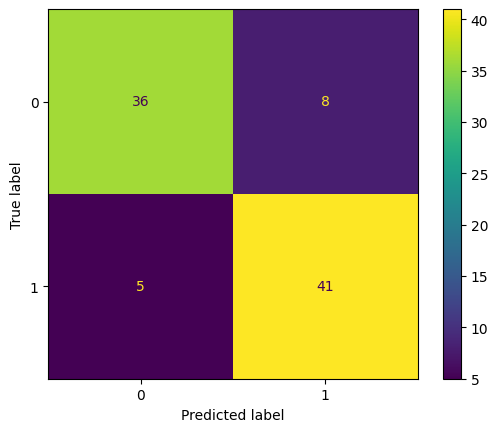

              precision    recall  f1-score   support

    conflict       0.88      0.82      0.85        44
 no-conflict       0.84      0.89      0.86        46

    accuracy                           0.86        90
   macro avg       0.86      0.85      0.86        90
weighted avg       0.86      0.86      0.86        90



accuracy,▁
conflict_f1-score,▁
conflict_precision,▁
conflict_recall,▁
no_conflict_f1-score,▁
no_conflict_precision,▁
no_conflict_recall,▁
accuracy,0.85556
conflict_f1-score,0.84706
conflict_precision,0.87805
conflict_recall,0.81818


In [88]:
wandb_config['model_name'] = "LR"
wandb_config['framework'] = "sklearn"
wandb_config['feature_level'] = "audio+text"
wandb_config['data'] = "init_full_1h"
wandb_config['feature_set'] = "twitter_smile_full"

df_file_twitter_smile_concat = df_file_smile_func_compare.drop(columns=['start', 'end', 'label']).merge(roberta_pipline_twitter_out_eng_df, on='path')

clf = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=0),
)

cross_validation_n_fold(clf, df_file_twitter_smile_concat.drop(columns=['path', 'label']),
               df_file_twitter_smile_concat['label'], wandb_config)

### Late fusion

[[35  9]
 [10 36]]


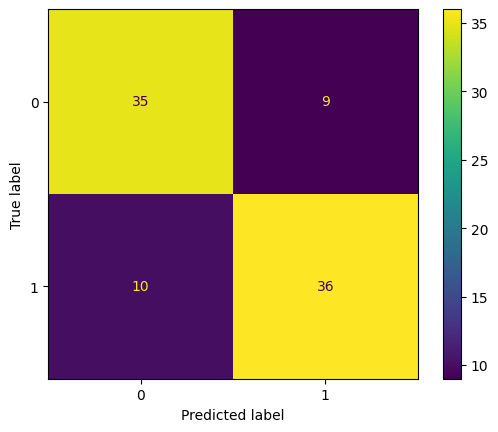

              precision    recall  f1-score   support

    conflict       0.78      0.80      0.79        44
 no-conflict       0.80      0.78      0.79        46

    accuracy                           0.79        90
   macro avg       0.79      0.79      0.79        90
weighted avg       0.79      0.79      0.79        90



In [193]:
wandb_config['model_name'] = "LR"
wandb_config['framework'] = "sklearn"
wandb_config['feature_level'] = "audio+text"
wandb_config['data'] = "init_full_1h"
wandb_config['feature_set'] = "twitter_smile_full"
wandb_config['
'] = "late_lr"

df_file_twitter_smile_concat = df_file_smile_func_compare.drop(columns=['start', 'end', 'label']).merge(roberta_pipline_twitter_out_eng_df, on='path')

clf1 = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=0),
)

clf2 = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=0),
)

cross_validation_n_fold_ensemble(clf1, clf2, df_file_smile_func_compare.drop(columns=['start', 'end', 'label', 'path']),
                                  roberta_pipline_twitter_out_eng_df.drop(columns=['label', 'path']),
                                  roberta_pipline_twitter_out_eng_df['label'], wandb_config)



## roberta-twitter (eng) + smile selected features



### Early fusion

[[40  4]
 [ 5 41]]


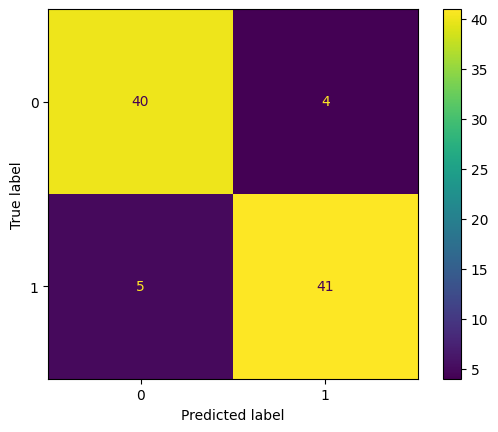

              precision    recall  f1-score   support

    conflict       0.89      0.91      0.90        44
 no-conflict       0.91      0.89      0.90        46

    accuracy                           0.90        90
   macro avg       0.90      0.90      0.90        90
weighted avg       0.90      0.90      0.90        90



accuracy,▁
conflict_f1-score,▁
conflict_precision,▁
conflict_recall,▁
no_conflict_f1-score,▁
no_conflict_precision,▁
no_conflict_recall,▁
accuracy,0.9
conflict_f1-score,0.89888
conflict_precision,0.88889
conflict_recall,0.90909


In [89]:
wandb_config['model_name'] = "LR"
wandb_config['framework'] = "sklearn"
wandb_config['feature_level'] = "audio+text"
wandb_config['data'] = "init_full_1h"
wandb_config['feature_set'] = "twitter_smile_selected"

df_file_twitter_smile_concat = df_file_smile_func_compare[selected_feature_names + ['path']].merge(roberta_pipline_twitter_out_eng_df, on='path')

clf = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=0),
)

cross_validation_n_fold(clf, df_file_twitter_smile_concat.drop(columns=['path', 'label']),
               df_file_twitter_smile_concat['label'], wandb_config)

## roberta-twitter (eng) + wav2vec 300m hs

### Early fusion

[[37  7]
 [ 8 38]]


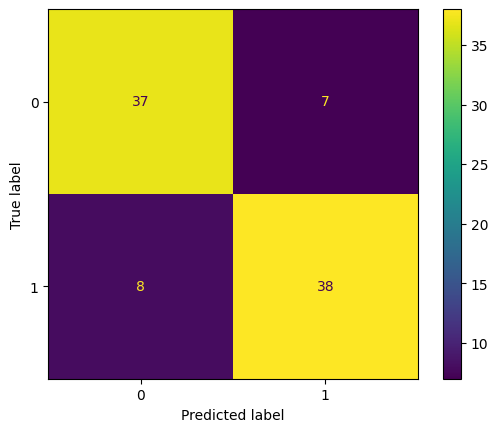

              precision    recall  f1-score   support

    conflict       0.82      0.84      0.83        44
 no-conflict       0.84      0.83      0.84        46

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.83      0.83      0.83        90



accuracy,▁
conflict_f1-score,▁
conflict_precision,▁
conflict_recall,▁
no_conflict_f1-score,▁
no_conflict_precision,▁
no_conflict_recall,▁
accuracy,0.83333
conflict_f1-score,0.83146
conflict_precision,0.82222
conflict_recall,0.84091


In [91]:
wandb_config['model_name'] = "LR"
wandb_config['framework'] = "sklearn"
wandb_config['feature_level'] = "audio+text"
wandb_config['data'] = "init_full_1h"
wandb_config['feature_set'] = "twitter_w2v_300_hs"


df_file_twitter_w2v_300_concat = df_file_hs_300m.loc[:, "path":].merge(roberta_pipline_twitter_out_eng_df, on='path')

clf = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=0),
)

cross_validation_n_fold(clf, df_file_twitter_w2v_300_concat.drop(columns=['path', 'label', 'folder']),
               df_file_twitter_w2v_300_concat['label'], wandb_config)

### Late fusion

[[36  8]
 [11 35]]


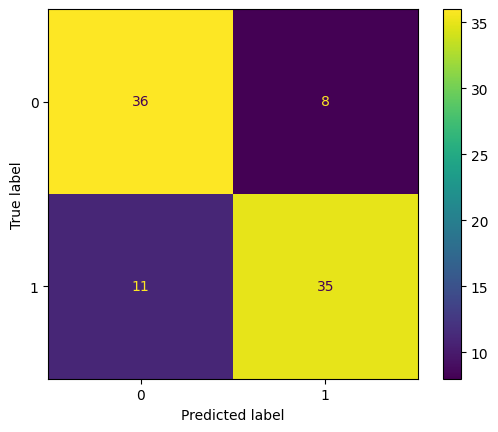

              precision    recall  f1-score   support

    conflict       0.77      0.82      0.79        44
 no-conflict       0.81      0.76      0.79        46

    accuracy                           0.79        90
   macro avg       0.79      0.79      0.79        90
weighted avg       0.79      0.79      0.79        90



accuracy,▁
conflict_f1-score,▁
conflict_precision,▁
conflict_recall,▁
no_conflict_f1-score,▁
no_conflict_precision,▁
no_conflict_recall,▁
accuracy,0.78889
conflict_f1-score,0.79121
conflict_precision,0.76596
conflict_recall,0.81818


In [191]:
wandb_config['model_name'] = "LR"
wandb_config['framework'] = "sklearn"
wandb_config['feature_level'] = "audio+text"
wandb_config['data'] = "init_full_1h"
wandb_config['feature_set'] = "twitter_w2v_300_hs"
wandb_config['fusion'] = "late_lr"

clf1 = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=0),
)

clf2 = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=0),
)

cross_validation_n_fold_ensemble(clf1, clf2, df_file_twitter_w2v_300_concat.drop(columns=['label', 'path', 'folder']),
                                  roberta_pipline_twitter_out_eng_df.drop(columns=['label', 'path']),
                                  roberta_pipline_twitter_out_eng_df['label'], wandb_config)



## roberta-twitter (eng) + wav2vec 300m CNN features



### Early fusion

[[36  8]
 [ 8 38]]


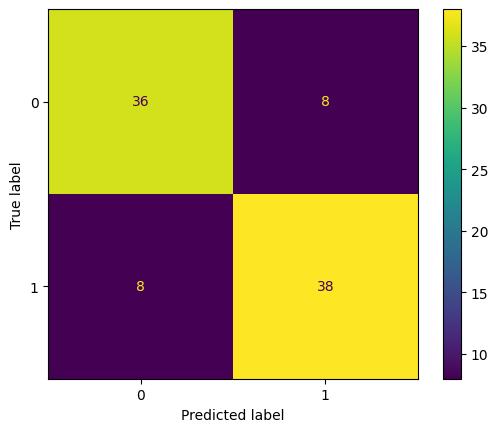

              precision    recall  f1-score   support

    conflict       0.82      0.82      0.82        44
 no-conflict       0.83      0.83      0.83        46

    accuracy                           0.82        90
   macro avg       0.82      0.82      0.82        90
weighted avg       0.82      0.82      0.82        90



accuracy,▁
conflict_f1-score,▁
conflict_precision,▁
conflict_recall,▁
no_conflict_f1-score,▁
no_conflict_precision,▁
no_conflict_recall,▁
accuracy,0.82222
conflict_f1-score,0.81818
conflict_precision,0.81818
conflict_recall,0.81818


In [92]:
wandb_config['model_name'] = "LR"
wandb_config['framework'] = "sklearn"
wandb_config['feature_level'] = "audio+text"
wandb_config['data'] = "init_full_1h"
wandb_config['feature_set'] = "twitter_w2v_30_ef"

df_file_twitter_w2v_300_concat_ef = df_file_ef_300m.loc[:, "path":].merge(roberta_pipline_twitter_out_eng_df, on='path')

clf = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=0),
)

cross_validation_n_fold(clf, df_file_twitter_w2v_300_concat_ef.drop(columns=['path', 'label', 'folder']),
               df_file_twitter_w2v_300_concat_ef['label'], wandb_config)

### twitter + wav2vec 1b HS


[[36  8]
 [ 8 38]]


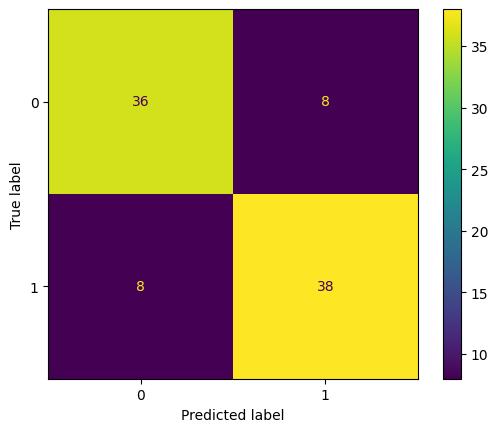

              precision    recall  f1-score   support

    conflict       0.82      0.82      0.82        44
 no-conflict       0.83      0.83      0.83        46

    accuracy                           0.82        90
   macro avg       0.82      0.82      0.82        90
weighted avg       0.82      0.82      0.82        90



accuracy,▁
conflict_f1-score,▁
conflict_precision,▁
conflict_recall,▁
no_conflict_f1-score,▁
no_conflict_precision,▁
no_conflict_recall,▁
accuracy,0.82222
conflict_f1-score,0.81818
conflict_precision,0.81818
conflict_recall,0.81818


In [93]:
wandb_config['model_name'] = "LR"
wandb_config['framework'] = "sklearn"
wandb_config['feature_level'] = "audio+text"
wandb_config['data'] = "init_full_1h"
wandb_config['feature_set'] = "twitter_w2v_1b_hs"

df_file_twitter_w2v_1b_concat = df_file_hs_1b.loc[:, "path":].merge(roberta_pipline_twitter_out_eng_df, on='path')

clf = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=0),
)

cross_validation_n_fold(clf, df_file_twitter_w2v_1b_concat.drop(columns=['path', 'label', 'folder']),
               df_file_twitter_w2v_1b_concat['label'], wandb_config)

## roberta-twitter (eng) + wav2vec 1b CNN features


### Early fusion

[[38  6]
 [ 8 38]]


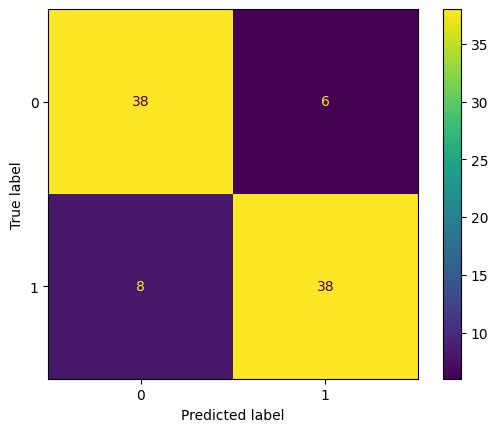

              precision    recall  f1-score   support

    conflict       0.83      0.86      0.84        44
 no-conflict       0.86      0.83      0.84        46

    accuracy                           0.84        90
   macro avg       0.84      0.84      0.84        90
weighted avg       0.85      0.84      0.84        90



accuracy,▁
conflict_f1-score,▁
conflict_precision,▁
conflict_recall,▁
no_conflict_f1-score,▁
no_conflict_precision,▁
no_conflict_recall,▁
accuracy,0.84444
conflict_f1-score,0.84444
conflict_precision,0.82609
conflict_recall,0.86364


In [94]:
wandb_config['model_name'] = "LR"
wandb_config['framework'] = "sklearn"
wandb_config['feature_level'] = "audio+text"
wandb_config['data'] = "init_full_1h"
wandb_config['feature_set'] = "twitter_w2v_1b_ef"

df_file_twitter_w2v_1b_concat_ef = df_file_ef_1b.loc[:, "path":].merge(roberta_pipline_twitter_out_eng_df, on='path')

clf = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=0),
)

cross_validation_n_fold(clf, df_file_twitter_w2v_1b_concat_ef.drop(columns=['path', 'label', 'folder']),
               df_file_twitter_w2v_1b_concat_ef['label'], wandb_config)

### Late fusion

[[37  7]
 [ 9 37]]


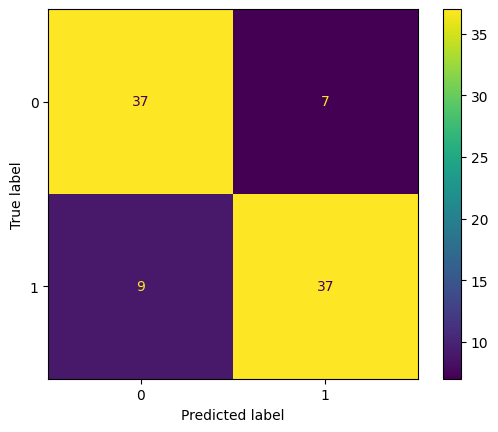

              precision    recall  f1-score   support

    conflict       0.80      0.84      0.82        44
 no-conflict       0.84      0.80      0.82        46

    accuracy                           0.82        90
   macro avg       0.82      0.82      0.82        90
weighted avg       0.82      0.82      0.82        90



accuracy,▁
conflict_f1-score,▁
conflict_precision,▁
conflict_recall,▁
no_conflict_f1-score,▁
no_conflict_precision,▁
no_conflict_recall,▁
accuracy,0.82222
conflict_f1-score,0.82222
conflict_precision,0.80435
conflict_recall,0.84091


In [197]:
wandb_config['model_name'] = "LR"
wandb_config['framework'] = "sklearn"
wandb_config['feature_level'] = "audio+text"
wandb_config['data'] = "init_full_1h"
wandb_config['feature_set'] = "twitter_w2v_1b_ef"
wandb_config['fusion'] = "late_lr"

clf1 = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=0),
)

clf2 = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=0),
)

cross_validation_n_fold_ensemble(clf1, clf2, df_file_ef_1b.loc[:,'ef_0':],
                                  roberta_pipline_twitter_out_eng_df.drop(columns=['label', 'path']),
                                  roberta_pipline_twitter_out_eng_df['label'], wandb_config)

## mDeBERTa-v3-base-mnli-xnli (transcribe) + smile full

### Early fusion

[[31 13]
 [10 36]]


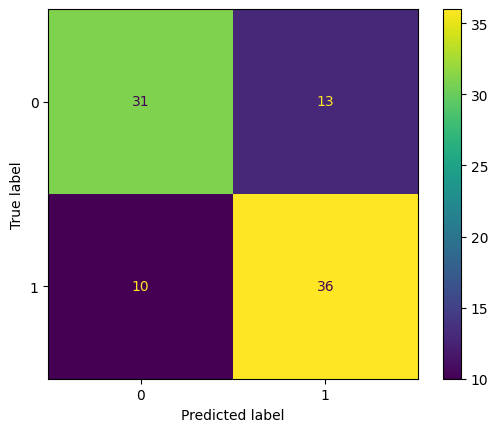

              precision    recall  f1-score   support

    conflict       0.76      0.70      0.73        44
 no-conflict       0.73      0.78      0.76        46

    accuracy                           0.74        90
   macro avg       0.75      0.74      0.74        90
weighted avg       0.75      0.74      0.74        90



accuracy,▁
conflict_f1-score,▁
conflict_precision,▁
conflict_recall,▁
no_conflict_f1-score,▁
no_conflict_precision,▁
no_conflict_recall,▁
accuracy,0.74444
conflict_f1-score,0.72941
conflict_precision,0.7561
conflict_recall,0.70455


In [95]:
wandb_config['model_name'] = "LR"
wandb_config['framework'] = "sklearn"
wandb_config['feature_level'] = "audio+text_transc"
wandb_config['data'] = "init_full_1h"
wandb_config['feature_set'] = "mdeberta_smile_full"

df_file_mdeberta_transc_smile_concat = df_file_smile_func_compare.drop(columns=['start', 'end', 'label']).merge(mdeberta_xnli_multi_transc, on='path')

clf = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=0),
)

cross_validation_n_fold(clf, df_file_mdeberta_transc_smile_concat.drop(columns=['path', 'label']),
               df_file_mdeberta_transc_smile_concat['label'], wandb_config)

:

### Late fusion

[[30 14]
 [13 33]]


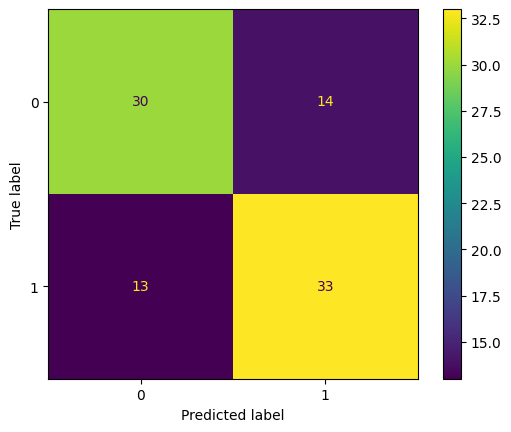

              precision    recall  f1-score   support

    conflict       0.70      0.68      0.69        44
 no-conflict       0.70      0.72      0.71        46

    accuracy                           0.70        90
   macro avg       0.70      0.70      0.70        90
weighted avg       0.70      0.70      0.70        90



accuracy,▁
conflict_f1-score,▁
conflict_precision,▁
conflict_recall,▁
no_conflict_f1-score,▁
no_conflict_precision,▁
no_conflict_recall,▁
accuracy,0.7
conflict_f1-score,0.68966
conflict_precision,0.69767
conflict_recall,0.68182


In [199]:
wandb_config['model_name'] = "LR"
wandb_config['framework'] = "sklearn"
wandb_config['feature_level'] = "audio+text"
wandb_config['data'] = "init_full_1h"
wandb_config['feature_set'] = "mdeberta_smile_full"
wandb_config['fusion'] = "late_lr"

clf1 = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=0),
)

clf2 = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=0),
)

cross_validation_n_fold_ensemble(clf1, clf2, df_file_smile_func_compare.drop(columns=['start', 'end', 'label', 'path']),
                                  mdeberta_xnli_multi_transc.drop(columns=['label', 'path']),
                                  mdeberta_xnli_multi_transc['label'], wandb_config)



## mDeBERTa-v3-base-mnli-xnli (transcribe) + smile selected features


### Early fusion

[[35  9]
 [ 9 37]]


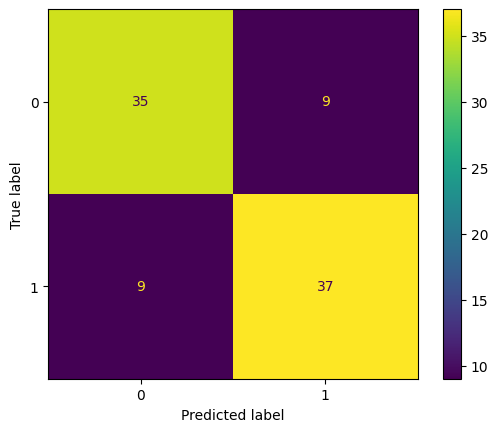

              precision    recall  f1-score   support

    conflict       0.80      0.80      0.80        44
 no-conflict       0.80      0.80      0.80        46

    accuracy                           0.80        90
   macro avg       0.80      0.80      0.80        90
weighted avg       0.80      0.80      0.80        90



accuracy,▁
conflict_f1-score,▁
conflict_precision,▁
conflict_recall,▁
no_conflict_f1-score,▁
no_conflict_precision,▁
no_conflict_recall,▁
accuracy,0.8
conflict_f1-score,0.79545
conflict_precision,0.79545
conflict_recall,0.79545


In [96]:
wandb_config['model_name'] = "LR"
wandb_config['framework'] = "sklearn"
wandb_config['feature_level'] = "audio+text_transc"
wandb_config['data'] = "init_full_1h"
wandb_config['feature_set'] = "mdeberta_smile_selected"


df_file_mdeberta_transc_smile_concat = df_file_smile_func_compare.drop(columns=['start', 'end', 'label'])[selected_feature_names + ['path']].merge(mdeberta_xnli_multi_transc, on='path')

clf = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=0),
)

cross_validation_n_fold(clf, df_file_mdeberta_transc_smile_concat.drop(columns=['path', 'label']),
               df_file_mdeberta_transc_smile_concat['label'], wandb_config)

## mDeBERTa-v3-base-mnli-xnli (transcribe) + wav2vec 300m hs



### Early fusion

[[30 14]
 [14 32]]


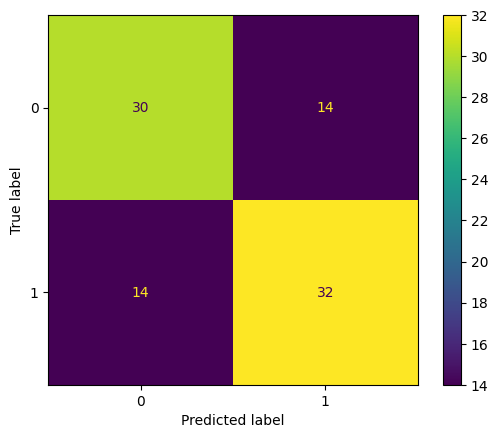

              precision    recall  f1-score   support

    conflict       0.68      0.68      0.68        44
 no-conflict       0.70      0.70      0.70        46

    accuracy                           0.69        90
   macro avg       0.69      0.69      0.69        90
weighted avg       0.69      0.69      0.69        90



accuracy,▁
conflict_f1-score,▁
conflict_precision,▁
conflict_recall,▁
no_conflict_f1-score,▁
no_conflict_precision,▁
no_conflict_recall,▁
accuracy,0.68889
conflict_f1-score,0.68182
conflict_precision,0.68182
conflict_recall,0.68182


In [97]:
wandb_config['model_name'] = "LR"
wandb_config['framework'] = "sklearn"
wandb_config['feature_level'] = "audio+text_transc"
wandb_config['data'] = "init_full_1h"
wandb_config['feature_set'] = "mdeberta_w2v_300_hs"


df_file_mdeberta_transc_w2v_300_concat = df_file_hs_300m.loc[:, "path":].merge(mdeberta_xnli_multi_transc, on='path')

clf = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=0),
)

cross_validation_n_fold(clf, df_file_mdeberta_transc_w2v_300_concat.drop(columns=['path', 'label', 'folder']),
               df_file_mdeberta_transc_w2v_300_concat['label'], wandb_config)

## mDeBERTa-v3-base-mnli-xnli (transcribe) + wav2vec 300m CNN features

### Early fusion

[[33 11]
 [15 31]]


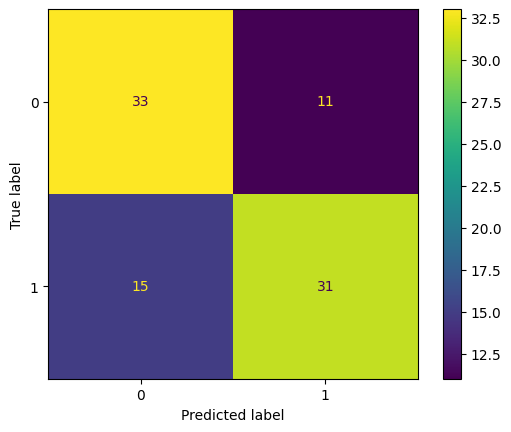

              precision    recall  f1-score   support

    conflict       0.69      0.75      0.72        44
 no-conflict       0.74      0.67      0.70        46

    accuracy                           0.71        90
   macro avg       0.71      0.71      0.71        90
weighted avg       0.71      0.71      0.71        90



accuracy,▁
conflict_f1-score,▁
conflict_precision,▁
conflict_recall,▁
no_conflict_f1-score,▁
no_conflict_precision,▁
no_conflict_recall,▁
accuracy,0.71111
conflict_f1-score,0.71739
conflict_precision,0.6875
conflict_recall,0.75


In [99]:
wandb_config['model_name'] = "LR"
wandb_config['framework'] = "sklearn"
wandb_config['feature_level'] = "audio+text_transc"
wandb_config['data'] = "init_full_1h"
wandb_config['feature_set'] = "mdeberta_w2v_300_ef"

df_file_mdeberta_transc_w2v_300_concat_ef = df_file_ef_300m.loc[:, "path":].merge(mdeberta_xnli_multi_transc, on='path')

clf = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=0),
)

cross_validation_n_fold(clf, df_file_mdeberta_transc_w2v_300_concat_ef.drop(columns=['path', 'label', 'folder']),
               df_file_mdeberta_transc_w2v_300_concat_ef['label'], wandb_config)

### Late fusion

[[31 13]
 [14 32]]


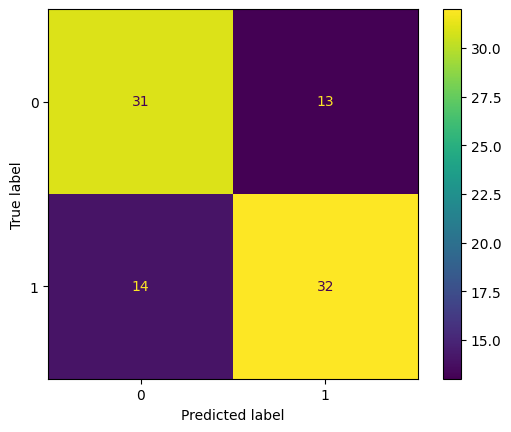

              precision    recall  f1-score   support

    conflict       0.69      0.70      0.70        44
 no-conflict       0.71      0.70      0.70        46

    accuracy                           0.70        90
   macro avg       0.70      0.70      0.70        90
weighted avg       0.70      0.70      0.70        90



accuracy,▁
conflict_f1-score,▁
conflict_precision,▁
conflict_recall,▁
no_conflict_f1-score,▁
no_conflict_precision,▁
no_conflict_recall,▁
accuracy,0.7
conflict_f1-score,0.69663
conflict_precision,0.68889
conflict_recall,0.70455


In [201]:
wandb_config['model_name'] = "LR"
wandb_config['framework'] = "sklearn"
wandb_config['feature_level'] = "audio+text"
wandb_config['data'] = "init_full_1h"
wandb_config['feature_set'] = "mdeberta_w2v_300_ef"
wandb_config['fusion'] = "late_lr"

clf1 = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=0),
)

clf2 = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=0),
)

cross_validation_n_fold_ensemble(clf1, clf2, df_file_ef_300m.loc[:, "ef_0":],
                                  mdeberta_xnli_multi_transc.drop(columns=['label', 'path']),
                                  mdeberta_xnli_multi_transc['label'], wandb_config)



## mDeBERTa-v3-base-mnli-xnli (transcribe) + wav2vec 1b hs

### Early fusion

[[30 14]
 [11 35]]


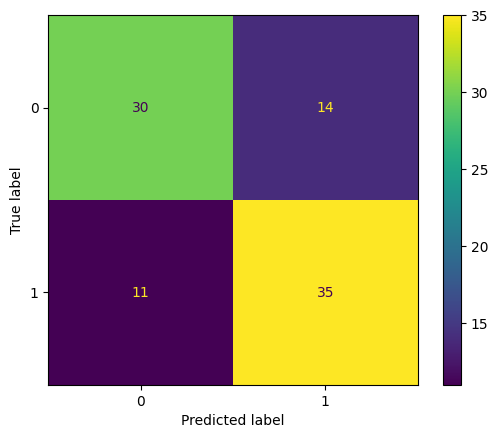

              precision    recall  f1-score   support

    conflict       0.73      0.68      0.71        44
 no-conflict       0.71      0.76      0.74        46

    accuracy                           0.72        90
   macro avg       0.72      0.72      0.72        90
weighted avg       0.72      0.72      0.72        90



accuracy,▁
conflict_f1-score,▁
conflict_precision,▁
conflict_recall,▁
no_conflict_f1-score,▁
no_conflict_precision,▁
no_conflict_recall,▁
accuracy,0.72222
conflict_f1-score,0.70588
conflict_precision,0.73171
conflict_recall,0.68182


In [100]:
wandb_config['model_name'] = "LR"
wandb_config['framework'] = "sklearn"
wandb_config['feature_level'] = "audio+text_transc"
wandb_config['data'] = "init_full_1h"
wandb_config['feature_set'] = "mdeberta_w2v_1b_hs"

df_file_mdeberta_transc_w2v_1b_concat = df_file_hs_1b.loc[:, "path":].merge(mdeberta_xnli_multi_transc, on='path')

clf = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=0),
)

cross_validation_n_fold(clf, df_file_mdeberta_transc_w2v_1b_concat.drop(columns=['path', 'label', 'folder']),
               df_file_mdeberta_transc_w2v_1b_concat['label'], wandb_config)

### Late fusion

[[33 11]
 [14 32]]


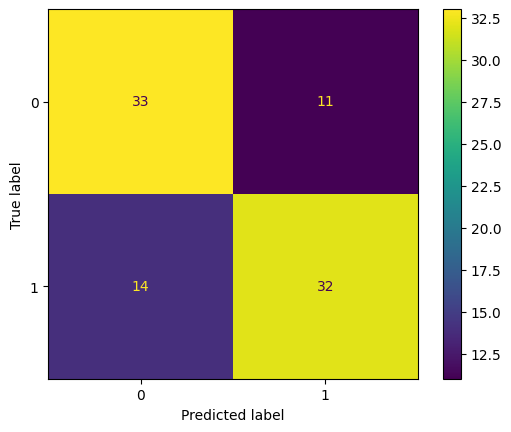

              precision    recall  f1-score   support

    conflict       0.70      0.75      0.73        44
 no-conflict       0.74      0.70      0.72        46

    accuracy                           0.72        90
   macro avg       0.72      0.72      0.72        90
weighted avg       0.72      0.72      0.72        90



accuracy,▁
conflict_f1-score,▁
conflict_precision,▁
conflict_recall,▁
no_conflict_f1-score,▁
no_conflict_precision,▁
no_conflict_recall,▁
accuracy,0.72222
conflict_f1-score,0.72527
conflict_precision,0.70213
conflict_recall,0.75


In [202]:
wandb_config['model_name'] = "LR"
wandb_config['framework'] = "sklearn"
wandb_config['feature_level'] = "audio+text"
wandb_config['data'] = "init_full_1h"
wandb_config['feature_set'] = "mdeberta_w2v_1b_hs"
wandb_config['fusion'] = "late_lr"

clf1 = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=0),
)

clf2 = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=0),
)

cross_validation_n_fold_ensemble(clf1, clf2, df_file_hs_1b.loc[:, "hs_0":],
                                  mdeberta_xnli_multi_transc.drop(columns=['label', 'path']),
                                  mdeberta_xnli_multi_transc['label'], wandb_config)



In [214]:
mdeberta_xnli_multi_transc.filter(regex='hs').shape[1]

(90, 768)

In [ ]:
model = LateFusionFC(mdeberta_xnli_multi_transc.filter(regex='hs').shape[1],
                     df_file_hs_1b.filter(regex='hs').shape[1],
                     output_dim=2)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0003)
criterion = nn.CrossEntropyLoss()
k = 5


X = torch.tensor(roberta_pipline_twitter_out_eng_df.drop(columns=['path', 'label']).astype('float32').values)
y = torch.tensor(roberta_pipline_twitter_out_eng_df['label'].factorize()[0])


cv_train_losses, cv_val_losses, cv_train_accs, cv_val_accs = kfold_cv(model.to('cpu'), X.to('cpu'), y.to('cpu'), k,
                                                                      embedding_dim, optimizer, criterion, num_epochs=6,
                                                                      batch_size=4)


## mDeBERTa-v3-base-mnli-xnli (transcribe) + wav2vec 1b CNN features

[[33 11]
 [15 31]]


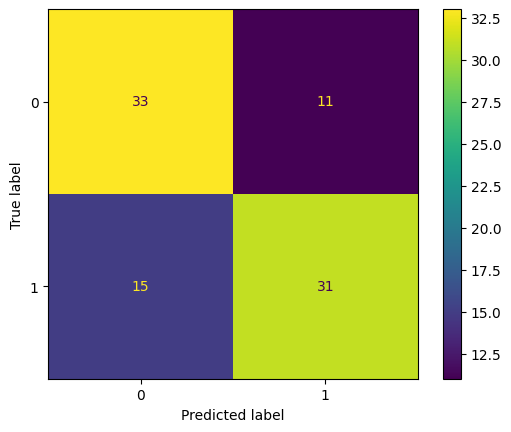

              precision    recall  f1-score   support

    conflict       0.69      0.75      0.72        44
 no-conflict       0.74      0.67      0.70        46

    accuracy                           0.71        90
   macro avg       0.71      0.71      0.71        90
weighted avg       0.71      0.71      0.71        90



accuracy,▁
conflict_f1-score,▁
conflict_precision,▁
conflict_recall,▁
no_conflict_f1-score,▁
no_conflict_precision,▁
no_conflict_recall,▁
accuracy,0.71111
conflict_f1-score,0.71739
conflict_precision,0.6875
conflict_recall,0.75


In [210]:
wandb_config['model_name'] = "LR"
wandb_config['framework'] = "sklearn"
wandb_config['feature_level'] = "audio+text_transc"
wandb_config['data'] = "init_full_1h"
wandb_config['feature_set'] = "mdeberta_w2v_1b_ef"

df_file_mdeberta_transc_w2v_1b_concat_ef = df_file_ef_1b.loc[:, "path":].merge(mdeberta_xnli_multi_transc, on='path')

clf = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=0),
)

cross_validation_n_fold(clf, df_file_mdeberta_transc_w2v_1b_concat_ef.drop(columns=['path', 'label', 'folder']),
               df_file_mdeberta_transc_w2v_1b_concat_ef['label'], wandb_config)

## roberta-twitter (eng) - LSTM

In [148]:
embedding_dim = 768
model = SentimentLSTM(embedding_dim, output_dim=2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0003)
criterion = nn.CrossEntropyLoss()
k = 5


X = torch.tensor(roberta_pipline_twitter_out_eng_df.drop(columns=['path', 'label']).astype('float32').values)
y = torch.tensor(roberta_pipline_twitter_out_eng_df['label'].factorize()[0])


cv_train_losses, cv_val_losses, cv_train_accs, cv_val_accs = kfold_cv(model.to('cpu'), X.to('cpu'), y.to('cpu'), k,
                                                                      embedding_dim, optimizer, criterion, num_epochs=6,
                                                                      batch_size=4)



Epoch: 1, Train Loss: 0.6637, Val Loss: 0.5672, Train Acc: 56.94%, Val Acc: 77.78%
Epoch: 2, Train Loss: 0.5539, Val Loss: 0.5016, Train Acc: 77.78%, Val Acc: 88.89%
Epoch: 3, Train Loss: 0.4916, Val Loss: 0.4489, Train Acc: 75.00%, Val Acc: 83.33%
Epoch: 4, Train Loss: 0.4423, Val Loss: 0.4073, Train Acc: 84.72%, Val Acc: 83.33%
Epoch: 5, Train Loss: 0.4108, Val Loss: 0.3761, Train Acc: 84.72%, Val Acc: 77.78%
Epoch: 6, Train Loss: 0.3634, Val Loss: 0.3414, Train Acc: 84.72%, Val Acc: 94.44%

Epoch: 1, Train Loss: 0.3251, Val Loss: 0.3260, Train Acc: 87.50%, Val Acc: 88.89%
Epoch: 2, Train Loss: 0.2739, Val Loss: 0.2902, Train Acc: 88.89%, Val Acc: 88.89%
Epoch: 3, Train Loss: 0.2451, Val Loss: 0.2783, Train Acc: 90.28%, Val Acc: 94.44%
Epoch: 4, Train Loss: 0.2238, Val Loss: 0.2641, Train Acc: 91.67%, Val Acc: 94.44%
Epoch: 5, Train Loss: 0.2102, Val Loss: 0.2545, Train Acc: 90.28%, Val Acc: 88.89%
Epoch: 6, Train Loss: 0.1984, Val Loss: 0.2537, Train Acc: 94.44%, Val Acc: 94.44%

E

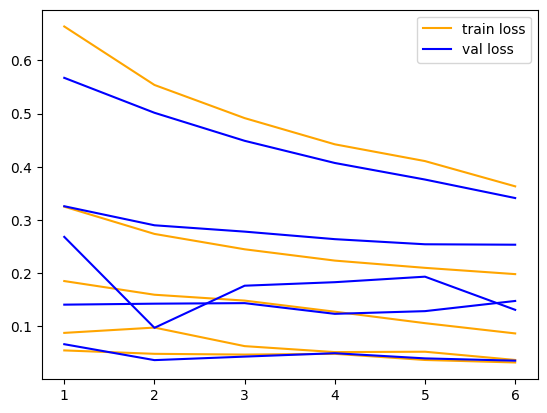

In [149]:
import matplotlib.pyplot as plt
import numpy as np

for k in range(len(cv_train_losses)):
  if k == 0:
    plt.plot(np.arange(1,len(cv_train_losses[k]) + 1), cv_train_losses[k], color='orange', label = "train loss")
    plt.plot(np.arange(1,len(cv_val_losses[k]) + 1), cv_val_losses[k], color='b', label = "val loss")
  else:
    plt.plot(np.arange(1,len(cv_train_losses[k]) + 1), cv_train_losses[k], color='orange')
    plt.plot(np.arange(1,len(cv_val_losses[k]) + 1), cv_val_losses[k], color='b')


plt.legend()
plt.show()

## roberta-twitter (eng) -  FC

In [166]:
embedding_dim = 768
model = SentimentFC(embedding_dim, output_dim=2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0003)
criterion = nn.CrossEntropyLoss()
k = 5


X = torch.tensor(roberta_pipline_twitter_out_eng_df.drop(columns=['path', 'label']).astype('float32').values)
y = torch.tensor(roberta_pipline_twitter_out_eng_df['label'].factorize()[0])


cv_train_losses, cv_val_losses, cv_train_accs, cv_val_accs = kfold_cv(model.to('cpu'), X.to('cpu'), y.to('cpu'), k,
                                                                      embedding_dim, optimizer, criterion, num_epochs=6,
                                                                      batch_size=4)



Epoch: 1, Train Loss: 0.6349, Val Loss: 0.5244, Train Acc: 66.67%, Val Acc: 72.22%
Epoch: 2, Train Loss: 0.5047, Val Loss: 0.4167, Train Acc: 79.17%, Val Acc: 77.78%
Epoch: 3, Train Loss: 0.4218, Val Loss: 0.4096, Train Acc: 83.33%, Val Acc: 77.78%
Epoch: 4, Train Loss: 0.3909, Val Loss: 0.3408, Train Acc: 84.72%, Val Acc: 83.33%
Epoch: 5, Train Loss: 0.3706, Val Loss: 0.2989, Train Acc: 88.89%, Val Acc: 94.44%
Epoch: 6, Train Loss: 0.3256, Val Loss: 0.2748, Train Acc: 83.33%, Val Acc: 94.44%

Epoch: 1, Train Loss: 0.2779, Val Loss: 0.2737, Train Acc: 90.28%, Val Acc: 94.44%
Epoch: 2, Train Loss: 0.2484, Val Loss: 0.2569, Train Acc: 90.28%, Val Acc: 94.44%
Epoch: 3, Train Loss: 0.2167, Val Loss: 0.2465, Train Acc: 93.06%, Val Acc: 94.44%
Epoch: 4, Train Loss: 0.2005, Val Loss: 0.2325, Train Acc: 95.83%, Val Acc: 88.89%
Epoch: 5, Train Loss: 0.1790, Val Loss: 0.2185, Train Acc: 94.44%, Val Acc: 88.89%
Epoch: 6, Train Loss: 0.1838, Val Loss: 0.2193, Train Acc: 91.67%, Val Acc: 88.89%

E

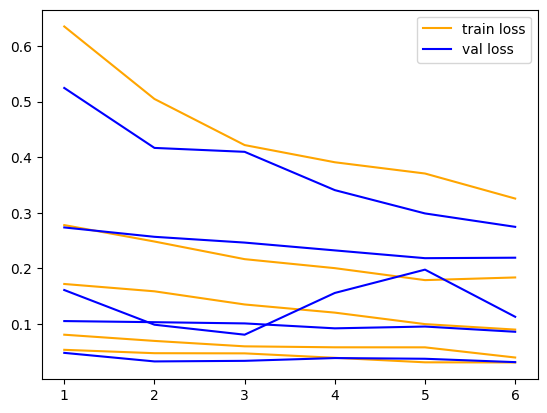

In [167]:
import matplotlib.pyplot as plt
import numpy as np

for k in range(len(cv_train_losses)):
  if k == 0:
    plt.plot(np.arange(1,len(cv_train_losses[k]) + 1), cv_train_losses[k], color='orange', label = "train loss")
    plt.plot(np.arange(1,len(cv_val_losses[k]) + 1), cv_val_losses[k], color='b', label = "val loss")
  else:
    plt.plot(np.arange(1,len(cv_train_losses[k]) + 1), cv_train_losses[k], color='orange')
    plt.plot(np.arange(1,len(cv_val_losses[k]) + 1), cv_val_losses[k], color='b')


plt.legend()
plt.show()